# Machine Learning Group Project - Group 50
## Masters in Data Science and Advanced Analytics at NOVA IMS, Lisbon

## Group Information
Group members:
Md. Shawkatul Islam Aziz<br>
Md. Tahir Hossain<br>
Philipp Metzger<br>
Ali Sabbir<br>
Henrique Vaz<br>

# **<span style="color:red">Important to do before hand in:</span><br>**

Kaggle competition rule 2:
The notebook should be able to run from the beginning till the end with no errors in any machine (if you install libraries besides the ones we gave during practical classes, **<span style="color:red">do not forget to write code in order install those libraries when running the notebook).</span><br>**

Kaggle competition rule 6 - While it is not supposed from us to run the jupyter notebook, if any doubt arises we may do it. **<span style="color:red">If the notebook does not run till the end, you are going to be penalized in the grade.</span><br>** If when we run the notebook, the performance of your model does not match the performance referred in the report and the model chosen in Kaggle, your grade will be penalized.

https://www.kaggle.com/c/newland/rules

# **To do:**
- Create and use something like the graph on the bottom right side (also the other ones maybe) of "8_EnsembleClassifiers" slide 36
- Check feature importance with all features for gradient boosting method
- Try ither type of scaler

## Import all libraries needed

**Post by Carina that specifies which libraries we are allowed to use**

Anúncios - About using other libraries in the Project
by Carina Albuquerque - Sunday, 29 November 2020, 4:58 PM

"Dear students,

as seems to have some confusion on what you can or not use related to libraries in the project, the rules are clear in Kaggle:

"You can only use Sklearn machine learning models (you can use other libraries for different purposes than modelling). If you use any algorithm or technique not presented on the practical classes, you should explain in detail how the algorithm / technique works in your report and explain the chosen configurations."

In that way, if you want to use XGBoost as some asked during the classes, and as explained,  you can only use this library for other reasons than modelling (you can use it for example for Feature Selection).



Best regards,

Carina Albuquerque"

## Code for installing packages if needed

In [1]:
if False:
    
    # imblearn
    conda install -c conda-forge imbalanced-learn
    
    # datetime
    conda install -c trentonoliphant datetime
    
    # mlxtend
    conda install -c conda-forge mlxtend
    
    # xgboost (used for feature selection only)
    conda install -c conda-forge xgboost

SyntaxError: invalid syntax (<ipython-input-1-0f75a5a47f39>, line 4)

## Import packages

In [2]:
import os
import sys
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
import time
from xgboost import XGBClassifier
from xgboost import plot_importance as xgb_plot_imp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import random
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

## Load the data

In [3]:
train = pd.read_excel(os.path.join('..', 'Data', 'Train.xlsx'), sheet_name='Sheet1', engine ='openpyxl')
test = pd.read_excel(os.path.join('..', 'Data', 'Test.xlsx'), sheet_name='Sheet1', engine = 'openpyxl')

## First exploration of the training set

In [4]:
# Show the first three rows of 'train'
train.head(3)

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1


In [5]:
# Get the dimensions of 'train'
train.shape

(22400, 15)

In [6]:
# Check the data types and check if there are missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [7]:
# Get the basic descriptive statistics on 'train'
train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [8]:
# Find out the share of individuals with income higher than average and lower than average
higher = len(train.Income[train.Income==1])
lower = len(train.Income[train.Income==0])

percentage_higher = higher / len(train.Income) * 100
percentage_lower = lower / len(train.Income) * 100

print(round(percentage_higher,2), '% in the training set have a higher than average income.')
print(round(percentage_lower,2), '% in the training set have a lower than average income.')

23.71 % in the training set have a higher than average income.
76.29 % in the training set have a lower than average income.


**<span style="color:red">This means that the 'train' dataset is imbalanced in favor of class 0 ('lower than average')</span><br>**

In [9]:
# Define a function that assesses the class distribution in the target
def class_dist(target):
    """Takes a column with 0 and 1 values and returns their count and prints their percentages."""
    
    count = Counter(target)
    print('Number of rows:', count[0]+count[1])
    print("Percentage 0:", round(count[0]/(count[0]+count[1])*100, 4), '%')
    print("Percentage 1:", round(count[1]/(count[0]+count[1])*100, 4), '%')
    
    return count

class_dist(train.Income)

Number of rows: 22400
Percentage 0: 76.2902 %
Percentage 1: 23.7098 %


Counter({1: 5311, 0: 17089})

In [10]:
# Define a function that performs random oversampling on a training dataset
def rand_oversampling(X, y, sampling_strategy):
    """Takes a training dataset and a sampling strategy specification as input and performs random oversampling on it 
    and returns the resulting dataset."""
    
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy=sampling_strategy)
    
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X, y)
    
    return X_over, y_over

## Transform 'Birthday' to datetime format and get the age in days relative to today

In [11]:
# Define a function that maps month names to their integers

def monthToInt(monthStr):

    return {
            'January' : 1,
            'February' : 2,
            'March' : 3,
            'April' : 4,
            'May' : 5,
            'June' : 6,
            'July' : 7,
            'August' : 8,
            'September' : 9, 
            'October' : 10,
            'November' : 11,
            'December' : 12
    }[monthStr]

In [12]:
# Define a function that checks if a year is a leap year
# Adapted from:
# https://www.programiz.com/python-programming/examples/leap-year

# "A leap year is exactly divisible by 4 except for century years (years ending with 00). 
# The century year is a leap year only if it is perfectly divisible by 400."

def is_leapyear(year):
    if (year % 4) == 0:
        if (year % 100) == 0:
            if (year % 400) == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

In [13]:
# Define a function that takes the information from column 'Birthday' and adds a column that contains the
# birthdays as datetime objects and another column that contains the age of the person in days relative to today (2020)

def add_Birthday_date_Age_days_rel_to_2020(df):
    
    # Make a copy
    df_copy = df.copy()
    
    # Get the year, month and day from Strings in 'Birthday'
    split = df_copy.Birthday.str.split(',', expand=True)
    year = split.iloc[:,1].astype(int)
    month_day = split.iloc[:,0].str.strip(to_strip=' ').str.split(' ', expand=True)
    day = month_day.iloc[:,1].astype(int)
    month = month_day.iloc[:,0]
    
    # Map month names to integers
    month = month.map(lambda x:monthToInt(x))
    
    # Build a dataframe containing the date values
    frame = {'year':year, 'month':month, 'day':day}
    birthday = pd.DataFrame(frame)
    
    # Create datetime objects from the date values
    # Some problems with leap years (see below)
    birthday_date = []
    for i in range(birthday.shape[0]):
    
        # Get the values for this row
        year_i = int(birthday.iloc[i,0])
        month_i = int(birthday.iloc[i,1])
        day_i = int(birthday.iloc[i,2])

        # Leap years are incorrectly defined for this dataset.
        # For example row 359: year 2022, month 2, day 29 is a birthday in this datase, but in reality it does not 
        # exist.
        # -> Decrease all days where month=2 and day=29 that aren't in a leap year by 1 day to be able to use 
        # datetime.date

        # Get True if this year is a leap year, else False
        leapyear = is_leapyear(year_i)

        if (~leapyear and month_i==2 and day_i==29):
            day_i = day_i - 1
        date = datetime.date(year_i, month_i, day_i)
        birthday_date.append(date)
        
    # Convert the list to a pandas series
    birthday_date = pd.Series(birthday_date)
    
    # Insert 'birthday_date' as new column 'Birthday_date'
    df_copy.insert(loc=3, column='Birthday_date', value=birthday_date)
    
    # Compute time differences to today (2020) and keep only the value in days
    now = date.today()
    age = now - df_copy.Birthday_date
    age_days = age.dt.days
    
    # Insert 'age_days' as 'Age_days_rel_to_2020'
    df_copy.insert(loc=4, column='Age_days_rel_to_2020', value=age_days)
    
    # Return the resulting dataframe
    return df_copy

In [14]:
# Use the function defined above to add columns 'Birthday_date' and 'Age_days_rel_to_2020' to 'train'
train_2 = add_Birthday_date_Age_days_rel_to_2020(train)

test_2 = add_Birthday_date_Age_days_rel_to_2020(test)

In [15]:
# For later (Outlier detection): Save 'Birthday_date' is a new variable 'birthdays'
birthdays = train_2['Birthday_date']

In [16]:
# Drop columns 'Birthday' and 'Birthday_date'
train_2 = train_2.drop(columns=['Birthday', 'Birthday_date'])

test_2 = test_2.drop(columns=['Birthday', 'Birthday_date'])

In [17]:
# Check the result
train_2.head(3)

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,6389,Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,5450,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,4249,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1


In [18]:
test_2.head(3)

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,3150,Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,2332,Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
2,34888,Mr. Trevor Simpson,218,Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0


## Assess the existance of nan values and empty strings

In [19]:
# List the variables that have missing values and their missing value counts
train_2.isna().sum()[train_2.isna().sum()!=0]

Series([], dtype: int64)

In [20]:
test_2.isna().sum()[test_2.isna().sum()!=0]

Series([], dtype: int64)

In [21]:
# Get the total number of nan values
train_2.isna().sum()[train_2.isna().sum()!=0].sum()

0

In [22]:
test_2.isna().sum()[test_2.isna().sum()!=0].sum()

0

In [23]:
# See how many duplicated observations exist
train_2.duplicated().sum()

0

In [24]:
# Replace " " by nans
train_2.replace(" ", np.nan, inplace=True)

In [25]:
# Get the total number of nan values once more
train_2.isna().sum()[train_2.isna().sum()!=0].sum()

0

## Assessing the discriminatory power of the categorical features

In [26]:
# Adapted from Machine learning lab "Feature Selection"
def bar_charts_categorical(df, feature, target, rotation):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.setp(ax1.get_xticklabels(), rotation=rotation, horizontalalignment='right')
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    ax2 = plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.setp(ax2.get_xticklabels(), rotation=rotation, horizontalalignment='right')
    plt.ylabel("$p$")

    plt.show()

### Discriminatory power of 'Native Continent'

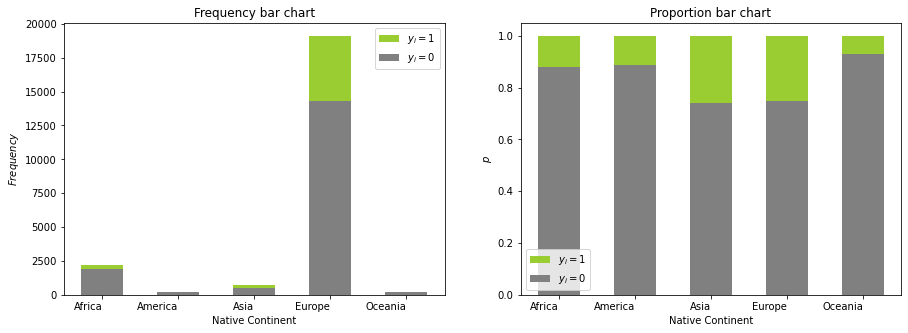

In [27]:
bar_charts_categorical(train, 'Native Continent', 'Income', 0)

### Discriminatory power of 'Marital Status'

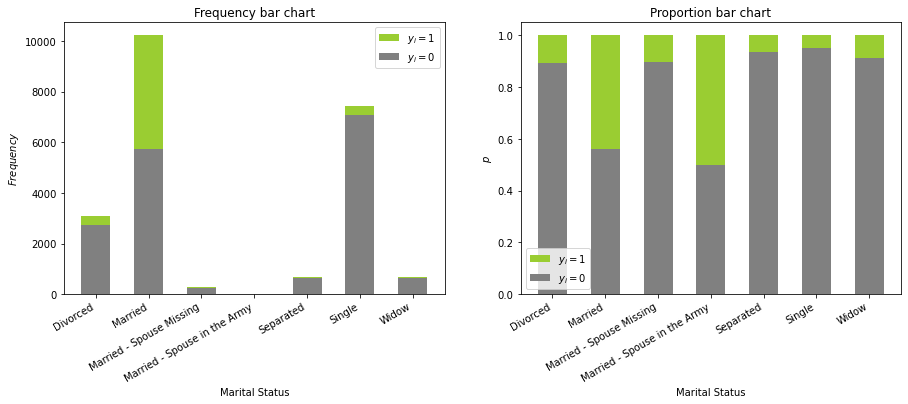

In [28]:
bar_charts_categorical(train, 'Marital Status', 'Income', 30)

### Discriminatory power of 'Lives with'

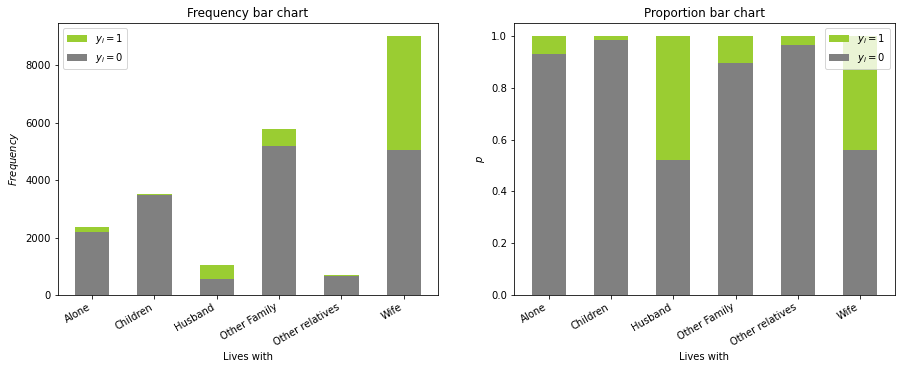

In [29]:
bar_charts_categorical(train, 'Lives with', 'Income', 30)

### Discriminatory power of 'Base Area'

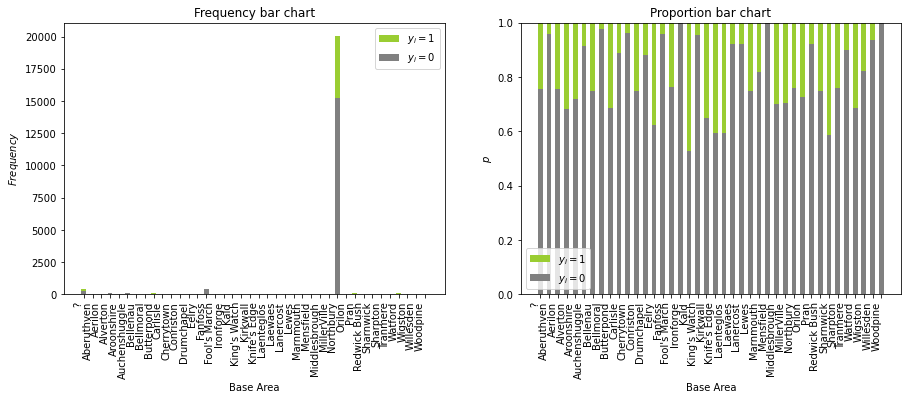

In [30]:
bar_charts_categorical(train, 'Base Area', 'Income', 90)

### Discriminatory power of 'Education Level'

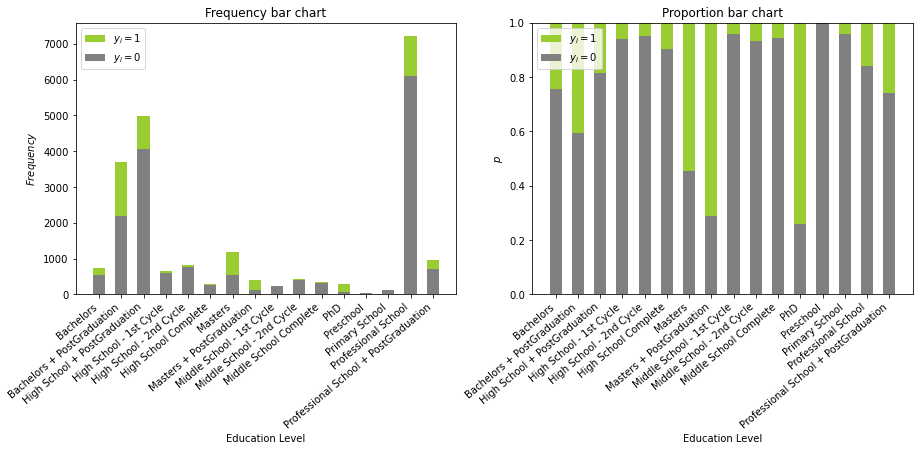

In [31]:
bar_charts_categorical(train, 'Education Level', 'Income', 40)

### Discriminatory power of  'Employment Sector'

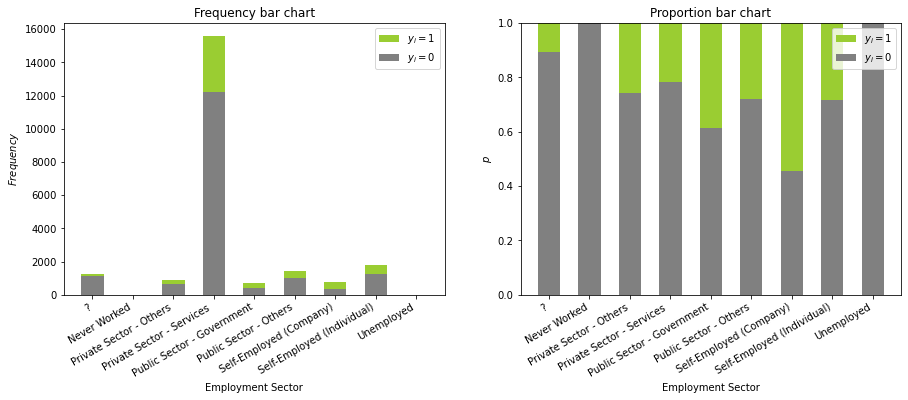

In [32]:
bar_charts_categorical(train, 'Employment Sector', 'Income', 30)

### Discriminatory power of  'Role'

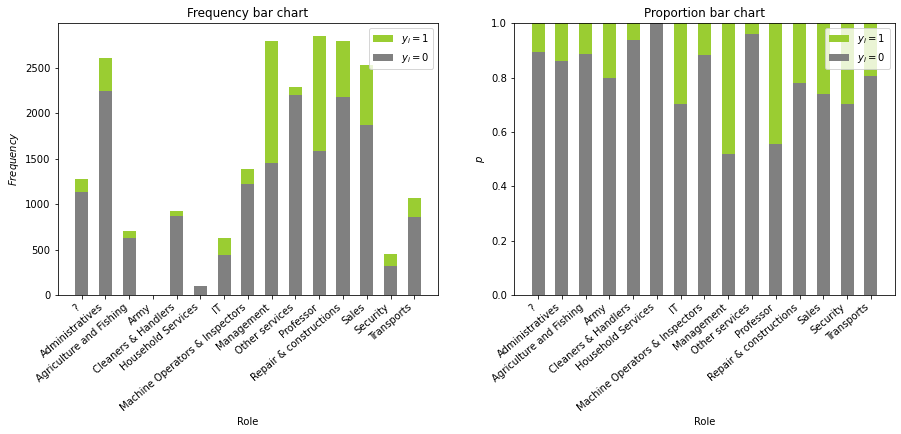

In [33]:
bar_charts_categorical(train, 'Role', 'Income', 40)

### Transform 'Ticket Price' into a binary variable and assess its discriminatory power

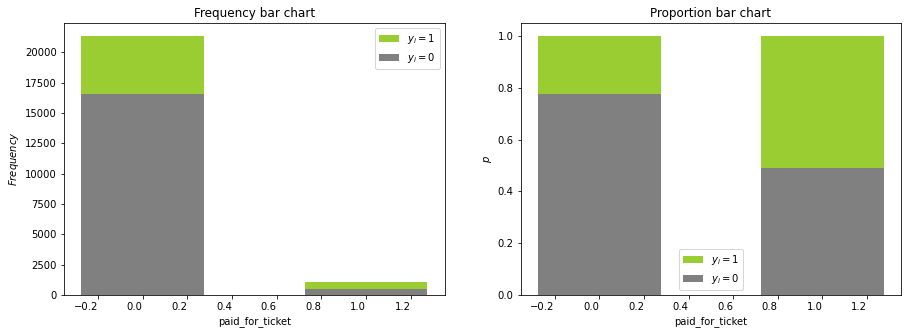

In [34]:
def make_binary(item):
    if item!=0:
        item=1
    return item

paid_for_ticket = train['Ticket Price'].map(lambda x:make_binary(x))
train_copy = train.copy()
train_copy.insert(loc=train_copy.shape[1]-1 , column='paid_for_ticket', value=paid_for_ticket)

bar_charts_categorical(train_copy, 'paid_for_ticket', 'Income', 0)

## One-hot encode categorical features

In [35]:
# Define a function that replaces a column by a set of columns
def replace_col(df, col_name, new_cols):
    df_copy = df.copy()
    col_index = df_copy.columns.get_loc(col_name)
    df_copy = df_copy.drop(columns=col_name)
    for col in range(new_cols.shape[1]):
        df_copy.insert(loc=col_index+col, column=list(new_cols)[col], value=new_cols.iloc[:,col])
    return df_copy    

In [36]:
# Define a function that one-hot encodes a column
def one_hot_encode(df, col_name, prefix):
    
    df_copy = df.copy()
    
    # Print the unique values to be one-hot encoded
    print('Unique values to be one-hot encoded:')
    print(pd.unique(df_copy[col_name]))
    
    # Compute dummy matrix
    y = pd.get_dummies(df_copy[col_name], prefix=prefix, dtype=float)
    
    if False:
        # Keeping all five variables would lead to one column being exactly the negation of the sum of the 
        # other columns. Show this:
        a = y.iloc[:,0]
        for col in range(1, y.shape[1]-1):
            a_=y.iloc[:,col]
            a=a+a_
        b=y.iloc[:, y.shape[1]-1]
        print()
        print('Correlation matrix of the sum of the first n-1 dummy features with the n-th dummy feature:')
        print(np.corrcoef(a.values,b.values))
    
    # Print the column that was discarded
    print()
    print('Column dropped (Case for which all dummy values = 0):')
    print(list(y)[y.shape[1]-1])
    
    # Discard the last dummy column because of this (See code block above)
    y = y.drop(list(y)[y.shape[1]-1], axis=1)
    
    # Use 'replace_col'
    df_copy = replace_col(df_copy, col_name, y)
    
    # Return the result
    return df_copy

In [37]:
def add_zero_columns(df_train, df_test):
    """A function that when used replaces adds the columns that are missing in the test set in comparison to the train
    set as columns of zeros"""
    
    # Get the names of the columns that are missing
    missing_col_names = list(set(df_train.drop(columns='Income')) - set(df_test))
        
    # Sort them. Otherwise, behaviour of this function is inconsistent
    missing_col_names.sort()
    
    # Create a column of zeros
    col_zeros = np.zeros((df_test.shape[0], 1))
    
    # Offset for insertion index
    offset = 0
    
    # Loop over them and add them as columns of zeros
    for col_name in missing_col_names:
        
        print(col_name)
        
        # Get the index in train of this column
        col_index = df_train.columns.get_loc(col_name)
        
        # Insert the column of zeros in the right place
        # df_test.insert(loc=col_index - 1 + offset, column=col_name, value=col_zeros)
        df_test.insert(loc=col_index, column=col_name, value=col_zeros)

        # Update offset
        offset = offset + 1
        
    return df_test

### One-hot encode 'Native Continent'

In [38]:
# Use 'one_hot_encode' on 'Native Continent'
train_3 = one_hot_encode(train_2, 'Native Continent', 'Native_Continent')

Unique values to be one-hot encoded:
['Europe' 'Africa' 'Asia' 'America' 'Oceania']

Column dropped (Case for which all dummy values = 0):
Native_Continent_Oceania


In [39]:
test_3 = one_hot_encode(test_2, 'Native Continent', 'Native_Continent')

Unique values to be one-hot encoded:
['Europe' 'Africa' 'Asia' 'America' 'Oceania']

Column dropped (Case for which all dummy values = 0):
Native_Continent_Oceania


In [40]:
# Check that test has the same format as train
list(train_3.drop(columns='Income'))==list(test_3)

True

In [41]:
# Print the column labels of the resulting dataframe
list(train_3)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital Status',
 'Lives with',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

### One-hot encode 'Marital Status'

In [42]:
# Use 'one_hot_encode' on 'Marital Status'
train_4 = one_hot_encode(train_3, 'Marital Status', 'Marital_Status')

Unique values to be one-hot encoded:
['Married' 'Single' 'Married - Spouse Missing' 'Divorced' 'Separated'
 'Widow' 'Married - Spouse in the Army']

Column dropped (Case for which all dummy values = 0):
Marital_Status_Widow


In [43]:
test_4 = one_hot_encode(test_3, 'Marital Status', 'Marital_Status')

Unique values to be one-hot encoded:
['Married' 'Single' 'Divorced' 'Widow' 'Separated'
 'Married - Spouse Missing' 'Married - Spouse in the Army']

Column dropped (Case for which all dummy values = 0):
Marital_Status_Widow


In [44]:
# Check that test has the same format as train
list(train_4.drop(columns='Income'))==list(test_4)

True

In [45]:
# Print the column labels of the resulting dataframe
list(train_4)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives with',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

### One-hot encode 'Lives with'

In [46]:
# Use 'one_hot_encode' on 'Lives with'
train_5 = one_hot_encode(train_4, 'Lives with', 'Lives_with')

Unique values to be one-hot encoded:
['Wife' 'Other Family' 'Children' 'Other relatives' 'Alone' 'Husband']

Column dropped (Case for which all dummy values = 0):
Lives_with_Wife


In [47]:
test_5 = one_hot_encode(test_4, 'Lives with', 'Lives_with')

Unique values to be one-hot encoded:
['Wife' 'Other Family' 'Husband' 'Alone' 'Children' 'Other relatives']

Column dropped (Case for which all dummy values = 0):
Lives_with_Wife


In [48]:
# Check that test has the same format as train
list(train_5.drop(columns='Income'))==list(test_5)

True

In [49]:
# Print the column labels of the resulting dataframe
list(train_5)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

### One-hot encode 'Base Area'

In [50]:
# Use 'one_hot_encode' on 'Base Area'
train_6 = one_hot_encode(train_5, 'Base Area', 'Base_Area')

Unique values to be one-hot encoded:
['Northbury' 'Auchenshuggle' 'Sharnwick' 'Laewaes' 'MillerVille' '?'
 'Fanfoss' 'Wigston' "Knife's Edge" 'Aerilon' 'Watford' 'Lanercost'
 'Bellmoral' 'Marnmouth' 'Bellenau' 'Butterpond' 'Laenteglos' 'Tranmere'
 'Eelry' 'Alverton' 'Pran' 'Willesden' "King's Watch" 'Kald' 'Kirkwall'
 "Fool's March" 'Middlesbrough' 'Orilon' 'Aroonshire' 'Aberuthven'
 'Sharpton' 'Lewes' 'Mensfield' 'Cherrytown' 'Redwick Bush' 'Drumchapel'
 'Carlisle' 'Conriston' 'Woodpine' 'Ironforge']

Column dropped (Case for which all dummy values = 0):
Base_Area_Woodpine


In [51]:
test_6 = one_hot_encode(test_5, 'Base Area', 'Base_Area')

Unique values to be one-hot encoded:
['Northbury' 'Watford' 'Marnmouth' '?' 'Bellmoral' "King's Watch"
 'Auchenshuggle' 'Willesden' 'Sharnwick' 'Conriston' 'Wigston' 'Fanfoss'
 'Kirkwall' 'Butterpond' 'Laewaes' 'Alverton' 'Pran' 'Aroonshire'
 "Knife's Edge" 'Orilon' 'Bellenau' "Fool's March" 'Eelry' 'Lanercost'
 'Sharpton' 'Cherrytown' 'Tranmere' 'Kald' 'Drumchapel' 'Aberuthven'
 'Laenteglos' 'Lewes' 'Redwick Bush' 'Middlesbrough' 'Aerilon'
 'MillerVille' 'Woodpine' 'Mensfield']

Column dropped (Case for which all dummy values = 0):
Base_Area_Woodpine


In [52]:
# Check that test has the same format as train
print('Train and test the same:')
print(list(train_6.drop(columns='Income'))==list(test_6))

print('Number of missing columns:')
print(len(list(train_6.drop(columns='Income'))) - len(list(test_6)))

print('Missing columns:')
missing = list(set(train_6.drop(columns='Income')) - set(test_6))
print(missing)

Train and test the same:
False
Number of missing columns:
2
Missing columns:
['Base_Area_Carlisle', 'Base_Area_Ironforge']


In [53]:
# Add the missing columns
test_6 = add_zero_columns(train_6, test_6)

Base_Area_Carlisle
Base_Area_Ironforge


In [54]:
# Check that test has the same format as train
print('Train and test the same:')
print(list(train_6.drop(columns='Income'))==list(test_6))

print('Number of missing columns:')
print(len(list(train_6.drop(columns='Income'))) - len(list(test_6)))

print('Missing columns:')
missing = list(set(train_6.drop(columns='Income')) - set(test_6))
print(missing)

Train and test the same:
True
Number of missing columns:
0
Missing columns:
[]


In [55]:
train_6.columns.get_loc('Base_Area_Ironforge')

34

In [56]:
test_6.columns.get_loc('Base_Area_Ironforge')

34

In [57]:
train_6.columns.get_loc('Base_Area_Carlisle')

27

In [58]:
test_6.columns.get_loc('Base_Area_Carlisle')

27

### One-hot encode 'Employment Sector'

In [59]:
# Use 'one_hot_encode' on 'Employment Sector'
train_7 = one_hot_encode(train_6, 'Employment Sector', 'Employment_Sector')

Unique values to be one-hot encoded:
['Private Sector - Services ' 'Public Sector - Others'
 'Self-Employed (Individual)' 'Private Sector - Others' '?'
 'Self-Employed (Company)' 'Public Sector - Government' 'Unemployed'
 'Never Worked']

Column dropped (Case for which all dummy values = 0):
Employment_Sector_Unemployed


In [60]:
test_7 = one_hot_encode(test_6, 'Employment Sector', 'Employment_Sector')

Unique values to be one-hot encoded:
['Private Sector - Services ' 'Public Sector - Others'
 'Self-Employed (Company)' '?' 'Self-Employed (Individual)'
 'Public Sector - Government' 'Private Sector - Others' 'Unemployed']

Column dropped (Case for which all dummy values = 0):
Employment_Sector_Unemployed


In [61]:
# Check that test has the same format as train
print('Train and test the same:')
print(list(train_7.drop(columns='Income'))==list(test_7))

print('Number of missing columns:')
print(len(list(train_7.drop(columns='Income'))) - len(list(test_7)))

print('Missing columns:')
missing = list(set(train_7.drop(columns='Income')) - set(test_7))
print(missing)

Train and test the same:
False
Number of missing columns:
1
Missing columns:
['Employment_Sector_Never Worked']


In [62]:
# Add the missing columns
test_7 = add_zero_columns(train_7, test_7)

Employment_Sector_Never Worked


In [63]:
# Check that test has the same format as train
print('Train and test the same:')
print(list(train_7.drop(columns='Income'))==list(test_7))

print('Number of missing columns:')
print(len(list(train_7.drop(columns='Income'))) - len(list(test_7)))

print('Missing columns:')
missing = list(set(train_7.drop(columns='Income')) - set(test_7))
print(missing)

Train and test the same:
True
Number of missing columns:
0
Missing columns:
[]


In [64]:
# Print the column labels of the resulting dataframe
list(train_7)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

### One-hot encode 'Role'

In [65]:
# Use 'one_hot_encode' on 'Role'
train_8 = one_hot_encode(train_7, 'Role', 'Role')

Unique values to be one-hot encoded:
['Repair & constructions' 'Sales' 'Security' 'Professor'
 'Cleaners & Handlers' 'Other services' 'Machine Operators & Inspectors'
 'Management' 'Administratives' 'Transports' '?' 'Agriculture and Fishing'
 'IT' 'Household Services' 'Army']

Column dropped (Case for which all dummy values = 0):
Role_Transports


In [66]:
test_8 = one_hot_encode(test_7, 'Role', 'Role')

Unique values to be one-hot encoded:
['Sales' 'Professor' 'Management' 'Machine Operators & Inspectors'
 'Administratives' 'Agriculture and Fishing' '?' 'Other services'
 'Repair & constructions' 'Transports' 'Cleaners & Handlers' 'IT'
 'Security' 'Household Services' 'Army']

Column dropped (Case for which all dummy values = 0):
Role_Transports


In [67]:
# Check that test has the same format as train
print('Train and test the same:')
print(list(train_8.drop(columns='Income'))==list(test_8))

Train and test the same:
True


## Encoding 'Education Level'
**With 'Education Level' One-Hot Encoding is not appropriate since there is a meaningful order to the different levels of education**

In [68]:
# Creating a classification for the education level. First we'll check the values
set(list(train_8['Education Level']))

{'Bachelors',
 'Bachelors + PostGraduation',
 'High School + PostGraduation',
 'High School - 1st Cycle',
 'High School - 2nd Cycle',
 'High School Complete',
 'Masters',
 'Masters + PostGraduation',
 'Middle School - 1st Cycle',
 'Middle School - 2nd Cycle',
 'Middle School Complete',
 'PhD',
 'Preschool',
 'Primary School',
 'Professional School',
 'Professional School + PostGraduation'}

In [69]:
# Since the results represent a gradient and there are different levels of time investment in them we can classify
# them from lowest to largest

# Create a dictionary with the classification according to 'National Center for Education Statistics'
edu_classification = {1 : 'Preschool',
                      2 : 'Primary School',
                      3 : 'Middle School - 1st Cycle',
                      4 : 'Middle School - 2nd Cycle',
                      5 : 'Middle School Complete',
                      6 : 'High School - 1st Cycle',
                      7 : 'High School - 2nd Cycle',
                      8 : 'Professional School',
                      9 : 'High School Complete',
                      10 : 'Professional School + PostGraduation',
                      11 : 'High School + PostGraduation',
                      12 : 'Bachelors',
                      13 : 'Bachelors + PostGraduation',
                      14 : 'Masters',
                      15 : 'Masters + PostGraduation',
                      16 : 'PhD'
}

In [70]:
# Now we will create an auxiliar function that receives a level and assigns its corresponding classification 

def edu_classifier(level, classifier = edu_classification):
    """This funtion receives a level of education and a dictionary with education levels classification and returns
    the classification of a given level of education."""
    # List all the classifications in a specific order
    classif = list(edu_classification.keys())
    # List the education levels in the same order than the classifications
    edu_level = list(edu_classification.values())
    # Get the value where the given level's index does match in both lists
    return classif[edu_level.index(level)]

In [71]:
# Create a new column in the dataset using the classifications

# Apply 'edu_classifier' and convert the result to a single column dataframe
education_level_classified = train_8['Education Level'].apply(edu_classifier)
education_level_classified = education_level_classified.rename('Education_Level_Classified')
education_level_classified = pd.DataFrame(education_level_classified)

# Use 'replace_col'
train_9 = replace_col(train_8, 'Education Level', education_level_classified)

# Check the resulting new column
train_9[['Education_Level_Classified']].head()

,Education_Level_Classified
0,11
1,8
2,8
3,7
4,16


In [72]:
# Create a new column in the dataset using the classifications

# Apply 'edu_classifier' and convert the result to a single column dataframe
education_level_classified = test_8['Education Level'].apply(edu_classifier)
education_level_classified = education_level_classified.rename('Education_Level_Classified')
education_level_classified = pd.DataFrame(education_level_classified)

# Use 'replace_col'
test_9 = replace_col(test_8, 'Education Level', education_level_classified)

# Check the resulting new column
test_9[['Education_Level_Classified']].head()

,Education_Level_Classified
0,13
1,13
2,10
3,8
4,12


In [73]:
# Check that test has the same format as train
print('Train and test the same:')
print(list(train_9.drop(columns='Income'))==list(test_9))

Train and test the same:
True


In [74]:
# Check all resulting column names
list(train_9)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

In [75]:
train_encoded = train_9
train_encoded.head(1)

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,...,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,6389,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,40,0,2273,1


In [76]:
test_encoded = test_9
test_encoded.head(1)

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,3150,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40,0,0


In [77]:
# Exclude ID, name and the target
train_data = train_encoded.drop(columns = {'Income'}).iloc[:, 2:]

# Save only the target
train_target = train_encoded['Income']

In [78]:
# Exclude the id and the name
test_data = test_encoded.iloc[:, 2:]

In [79]:
train_data.head(1)

,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,Marital_Status_Married - Spouse in the Army,Marital_Status_Separated,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price
0,6389,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40,0,2273


In [80]:
test_data.head(1)

,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,Marital_Status_Married - Spouse in the Army,Marital_Status_Separated,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price
0,3150,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40,0,0


In [81]:
# Check that test has the same format as train
print('Train and test the same:')
print(list(train_data)==list(test_data))

Train and test the same:
True


## Outlier detection

Features that could potentially have outliers:
'Age_days_rel_to_2020',
'Working Hours per week',
'Money Received' and
'Ticket Price'.

The other remaining features are encoded categorical features.

### 'Age_days_rel_to_2020'

In [82]:
# Show the age of the oldest and the youngest person in the data set
# The oldest person in the dataset is born somewhere around 1958 and the youngest person in the dataset is born 
# somewhere around 2031
print('Maximum and minimum of ages (roughly) in years:')
print(train_data['Age_days_rel_to_2020'].max()/365)
print(train_data['Age_days_rel_to_2020'].min()/365)

# Check that this makes sense by printing the birthdays of the oldest and of the youngest person in the data set (We 
# saved all birthdays in a previous step)
print()
print('Minimum and Maximum of birthdays:')
print(birthdays.min())
print(birthdays.max())

Maximum and minimum of ages (roughly) in years:
63.03013698630137
-10.794520547945206

Minimum and Maximum of birthdays:
1958-01-01
2031-10-11


**All values for 'Age_days_rel_to_2020' seem to be reasonable. No need to remove any outliers.**

### 'Working Hours per week'

In [83]:
print("Maximum and minimum of 'Working Hours per week':")
print(train_data['Working Hours per week'].max())
print(train_data['Working Hours per week'].min())

Maximum and minimum of 'Working Hours per week':
99
1


**One week has 24*7=168 hours. So, it is logially possible to work 99 hours.**

**Let's assume this person works every day. 99 hours divided by 7 is 14 hours. This would mean that 10 hours are left for sleeping and other activities. This could also be the case.**

**Let's assume this person works six days a week. 99 hours divided by 6 is 16.5 hours. This would mean that 7.5 hours are left for sleeping and other activities. For certain people (that either need little sleep or have no free time on work days), this could also be the case.**

**Conclusion: All values for 'Working Hours per week' seem to be reasonable. No need to remove any outliers.**

### 'Money Received'

In [84]:
print("Maximum and minimum of 'Money Received':")
print(train_data['Money Received'].max())
print(train_data['Money Received'].min())

Maximum and minimum of 'Money Received':
122999
0


**No negative values for 'Money Received'. No extremely high values either. No need to remove any outliers.**

### 'Ticket Price'

In [85]:
print("Maximum and minimum of 'Ticket Price':")
print(train_data['Ticket Price'].max())
print(train_data['Ticket Price'].min())

Maximum and minimum of 'Ticket Price':
5358
0


**No negative values for 'Ticket Price'. No extremely high values either. No need to remove any outliers.**

## Feature Scaling

In [86]:
# Use 'StandardScaler' to scale our data
# stdscaler = StandardScaler()
# train_data_scaled = pd.DataFrame(stdscaler.fit_transform(train_data), columns=train_data.columns)


# Fit a scaler to the training data
stdscaler = StandardScaler()
stdscaler_fitted = stdscaler.fit(train_data)

# Transform training data it with the fitted scaler
train_data_scaled = pd.DataFrame(stdscaler_fitted.transform(train_data), columns=train_data.columns)

# Transform test data it with the fitted scaler
test_data_scaled = pd.DataFrame(stdscaler.transform(test_data), columns=test_data.columns)

In [87]:
train_data_scaled.head(3)

,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,Marital_Status_Married - Spouse in the Army,Marital_Status_Separated,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price
0,0.461926,-0.328934,-0.099365,-0.179473,0.414849,-0.398673,1.091785,-0.11332,-0.025008,-0.179473,...,-0.256621,-0.377733,-0.337206,-0.381735,2.648455,-0.356909,-0.143182,-0.039108,-0.143582,4.325999
1,0.273671,-0.328934,-0.099365,-0.179473,0.414849,-0.398673,1.091785,-0.11332,-0.025008,-0.179473,...,-0.256621,-0.377733,-0.337206,-0.381735,2.648455,-0.356909,-0.143182,-0.039108,-0.143582,-0.218204
2,0.032889,-0.328934,-0.099365,-0.179473,0.414849,-0.398673,1.091785,-0.11332,-0.025008,-0.179473,...,-0.256621,-0.377733,-0.337206,-0.381735,-0.377579,2.801831,-0.143182,0.445911,-0.143582,4.421961


In [88]:
test_data_scaled.head(3)

,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,Marital_Status_Married - Spouse in the Army,Marital_Status_Separated,...,Role_Machine Operators & Inspectors,Role_Management,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price
0,-0.187444,-0.328934,-0.099365,-0.179473,0.414849,-0.398673,1.091785,-0.11332,-0.025008,-0.179473,...,-0.256621,-0.377733,-0.337206,-0.381735,-0.377579,2.801831,-0.143182,-0.039108,-0.143582,-0.218204
1,-0.351440,-0.328934,-0.099365,-0.179473,0.414849,-0.398673,-0.915931,-0.11332,-0.025008,-0.179473,...,-0.256621,-0.377733,-0.337206,2.619620,-0.377579,-0.356909,-0.143182,-0.362454,-0.143582,-0.218204
2,-0.775264,-0.328934,-0.099365,-0.179473,0.414849,2.508319,-0.915931,-0.11332,-0.025008,-0.179473,...,-0.256621,2.647372,-0.337206,-0.381735,-0.377579,-0.356909,-0.143182,0.769257,1.258738,-0.218204


In [89]:
# Check the result of the scaling
print('Minima:')
print(train_data_scaled.min())
print()
print('Maxima:')
print(train_data_scaled.max())

Minima:
Age_days_rel_to_2020       -1.608879
Native_Continent_Africa    -0.328934
Native_Continent_America   -0.099365
Native_Continent_Asia      -0.179473
Native_Continent_Europe    -2.410515
                              ...   
Role_Sales                 -0.356909
Role_Security              -0.143182
Working Hours per week     -3.191733
Money Received             -0.143582
Ticket Price               -0.218204
Length: 82, dtype: float64

Maxima:
Age_days_rel_to_2020         3.793377
Native_Continent_Africa      3.040122
Native_Continent_America    10.063951
Native_Continent_Asia        5.571874
Native_Continent_Europe      0.414849
                              ...    
Role_Sales                   2.801831
Role_Security                6.984109
Working Hours per week       4.730247
Money Received              13.185935
Ticket Price                10.493559
Length: 82, dtype: float64


## Feature Selection

### Correlations

In [90]:
# Create a train_data_scaled with the target variable also
train_data_scaled_target = train_data_scaled.copy()
train_data_scaled_target['Income'] = train_target.copy()

In [91]:
# Create a new correlation matrix with new features
new_metric_features_and_target = ['Age_days_rel_to_2020','Years of Education','Working Hours per week','Money Received','Ticket Price','Education_Level_Classified','Income']

In [92]:
# Compute the correlation matrix of 'train'
corr_pearson = train_data_scaled_target[new_metric_features_and_target].corr(method='pearson')
corr_spearman = train_data_scaled_target[new_metric_features_and_target].corr(method='spearman')

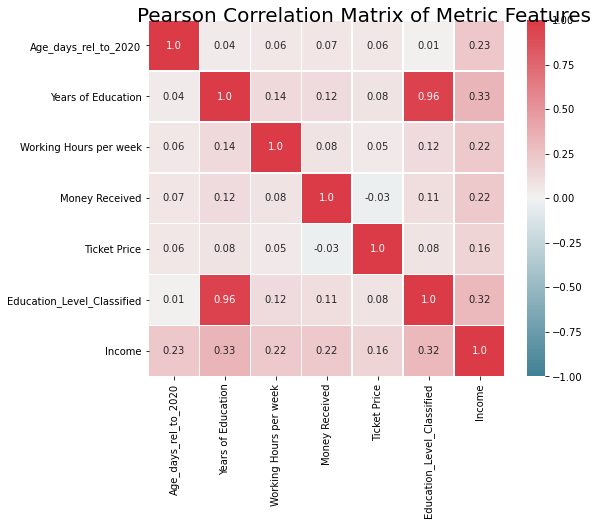

In [93]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(8, 6))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix of Metric Features", fontsize=20)

plt.show()

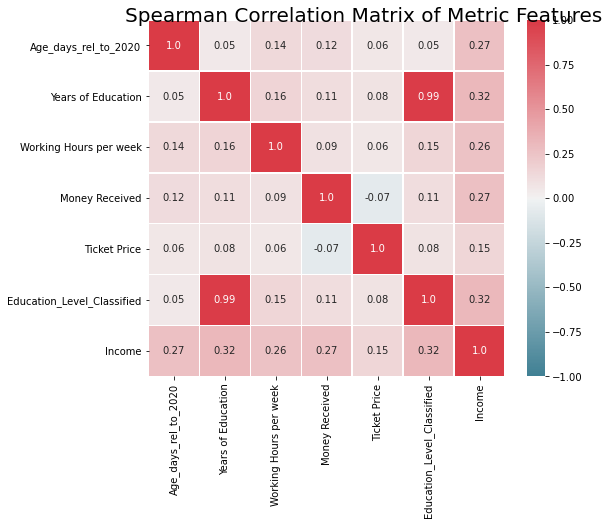

In [94]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(8, 6))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_spearman, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix of Metric Features", fontsize=20)

plt.show()

#### Based on the discriminatory analysis made above we can also try to remove some variable on a first approach and check the results.

We will for now remove 'Native Continent' related variables and the same for 'Base Area' since there doesn't seem to be much influence on the target variable caused by these two.

In [95]:
# Create a list with the columns to remove
columns_to_remove = ['Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_Laenteglos',
 'Base_Area_Laewaes',
 'Base_Area_Lanercost',
 'Base_Area_Lewes',
 'Base_Area_Marnmouth',
 'Base_Area_Mensfield',
 'Base_Area_Middlesbrough',
 'Base_Area_MillerVille',
 'Base_Area_Northbury',
 'Base_Area_Orilon',
 'Base_Area_Pran',
 'Base_Area_Redwick Bush',
 'Base_Area_Sharnwick',
 'Base_Area_Sharpton',
 'Base_Area_Tranmere',
 'Base_Area_Watford',
 'Base_Area_Wigston',
 'Base_Area_Willesden',
]

In [96]:
train_data_scaled.columns

Index(['Age_days_rel_to_2020', 'Native_Continent_Africa',
       'Native_Continent_America', 'Native_Continent_Asia',
       'Native_Continent_Europe', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Married - Spouse Missing',
       'Marital_Status_Married - Spouse in the Army',
       'Marital_Status_Separated', 'Marital_Status_Single', 'Lives_with_Alone',
       'Lives_with_Children', 'Lives_with_Husband', 'Lives_with_Other Family',
       'Lives_with_Other relatives', 'Base_Area_?', 'Base_Area_Aberuthven',
       'Base_Area_Aerilon', 'Base_Area_Alverton', 'Base_Area_Aroonshire',
       'Base_Area_Auchenshuggle', 'Base_Area_Bellenau', 'Base_Area_Bellmoral',
       'Base_Area_Butterpond', 'Base_Area_Carlisle', 'Base_Area_Cherrytown',
       'Base_Area_Conriston', 'Base_Area_Drumchapel', 'Base_Area_Eelry',
       'Base_Area_Fanfoss', 'Base_Area_Fool's March', 'Base_Area_Ironforge',
       'Base_Area_Kald', 'Base_Area_King's Watch', 'Base_Area_Kirkwall',
   

In [97]:
# Remove the columns
train_data_scaled_target.drop(columns = columns_to_remove, inplace = True)

In [98]:
# Remove the columns
# train_data_scaled.drop(columns = columns_to_remove, inplace = True)

In [99]:
# Compute the correlation pearson matrix of 'train_data'
corr_pearson = train_data_scaled_target.corr(method='pearson')

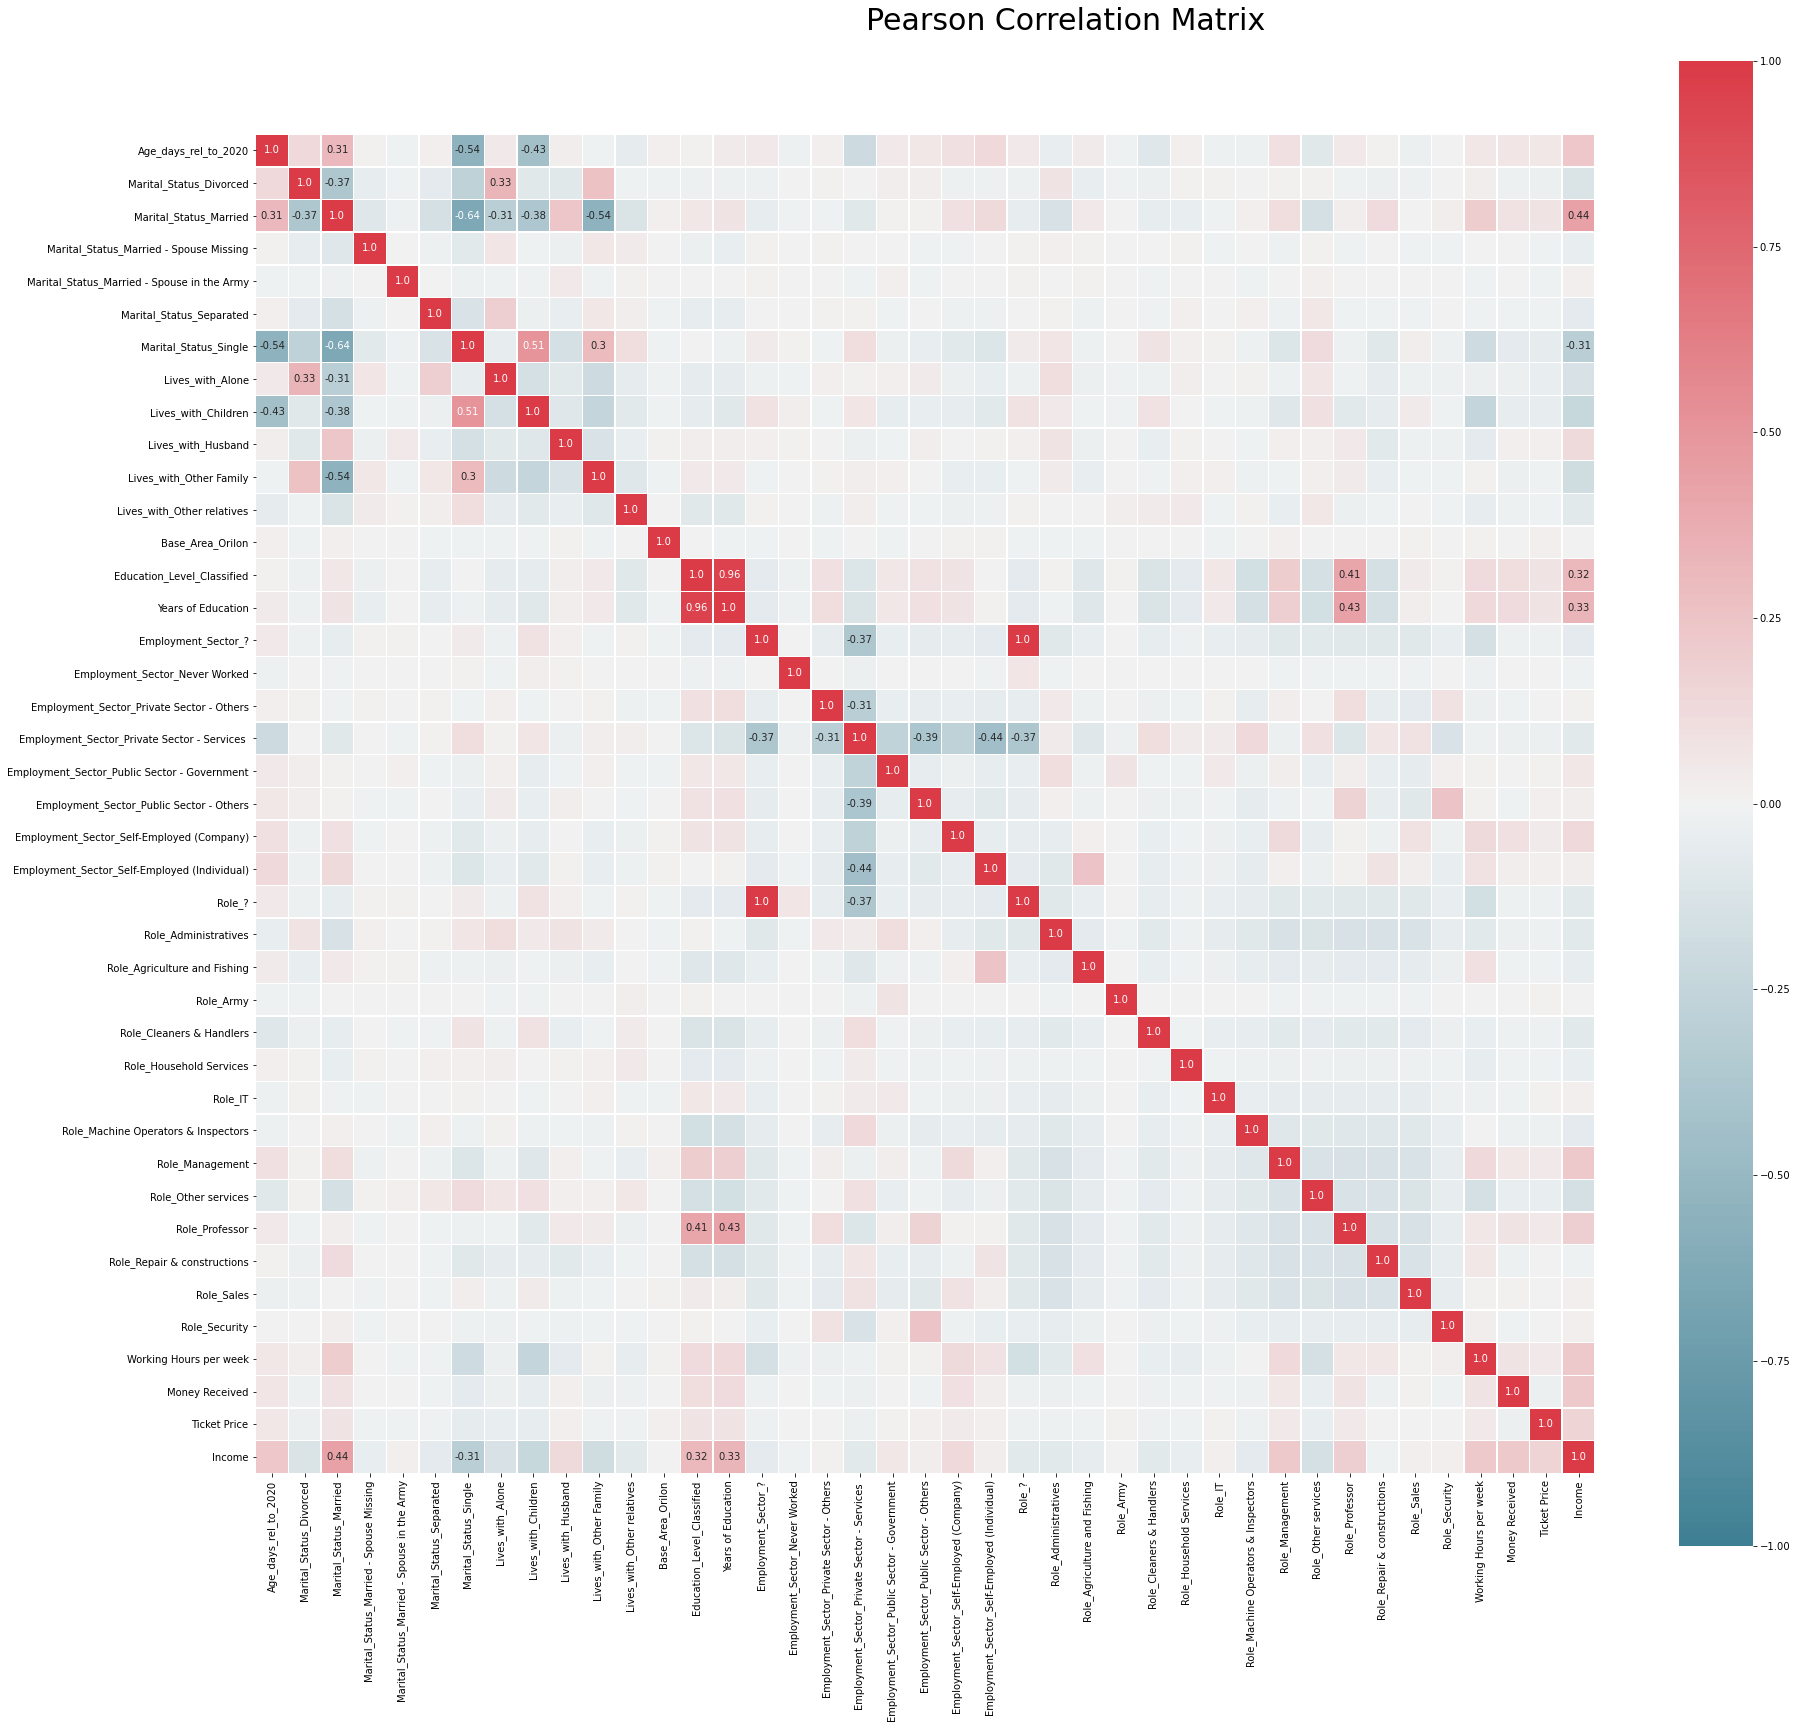

In [100]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(30, 25))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.3
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=30)

plt.show()

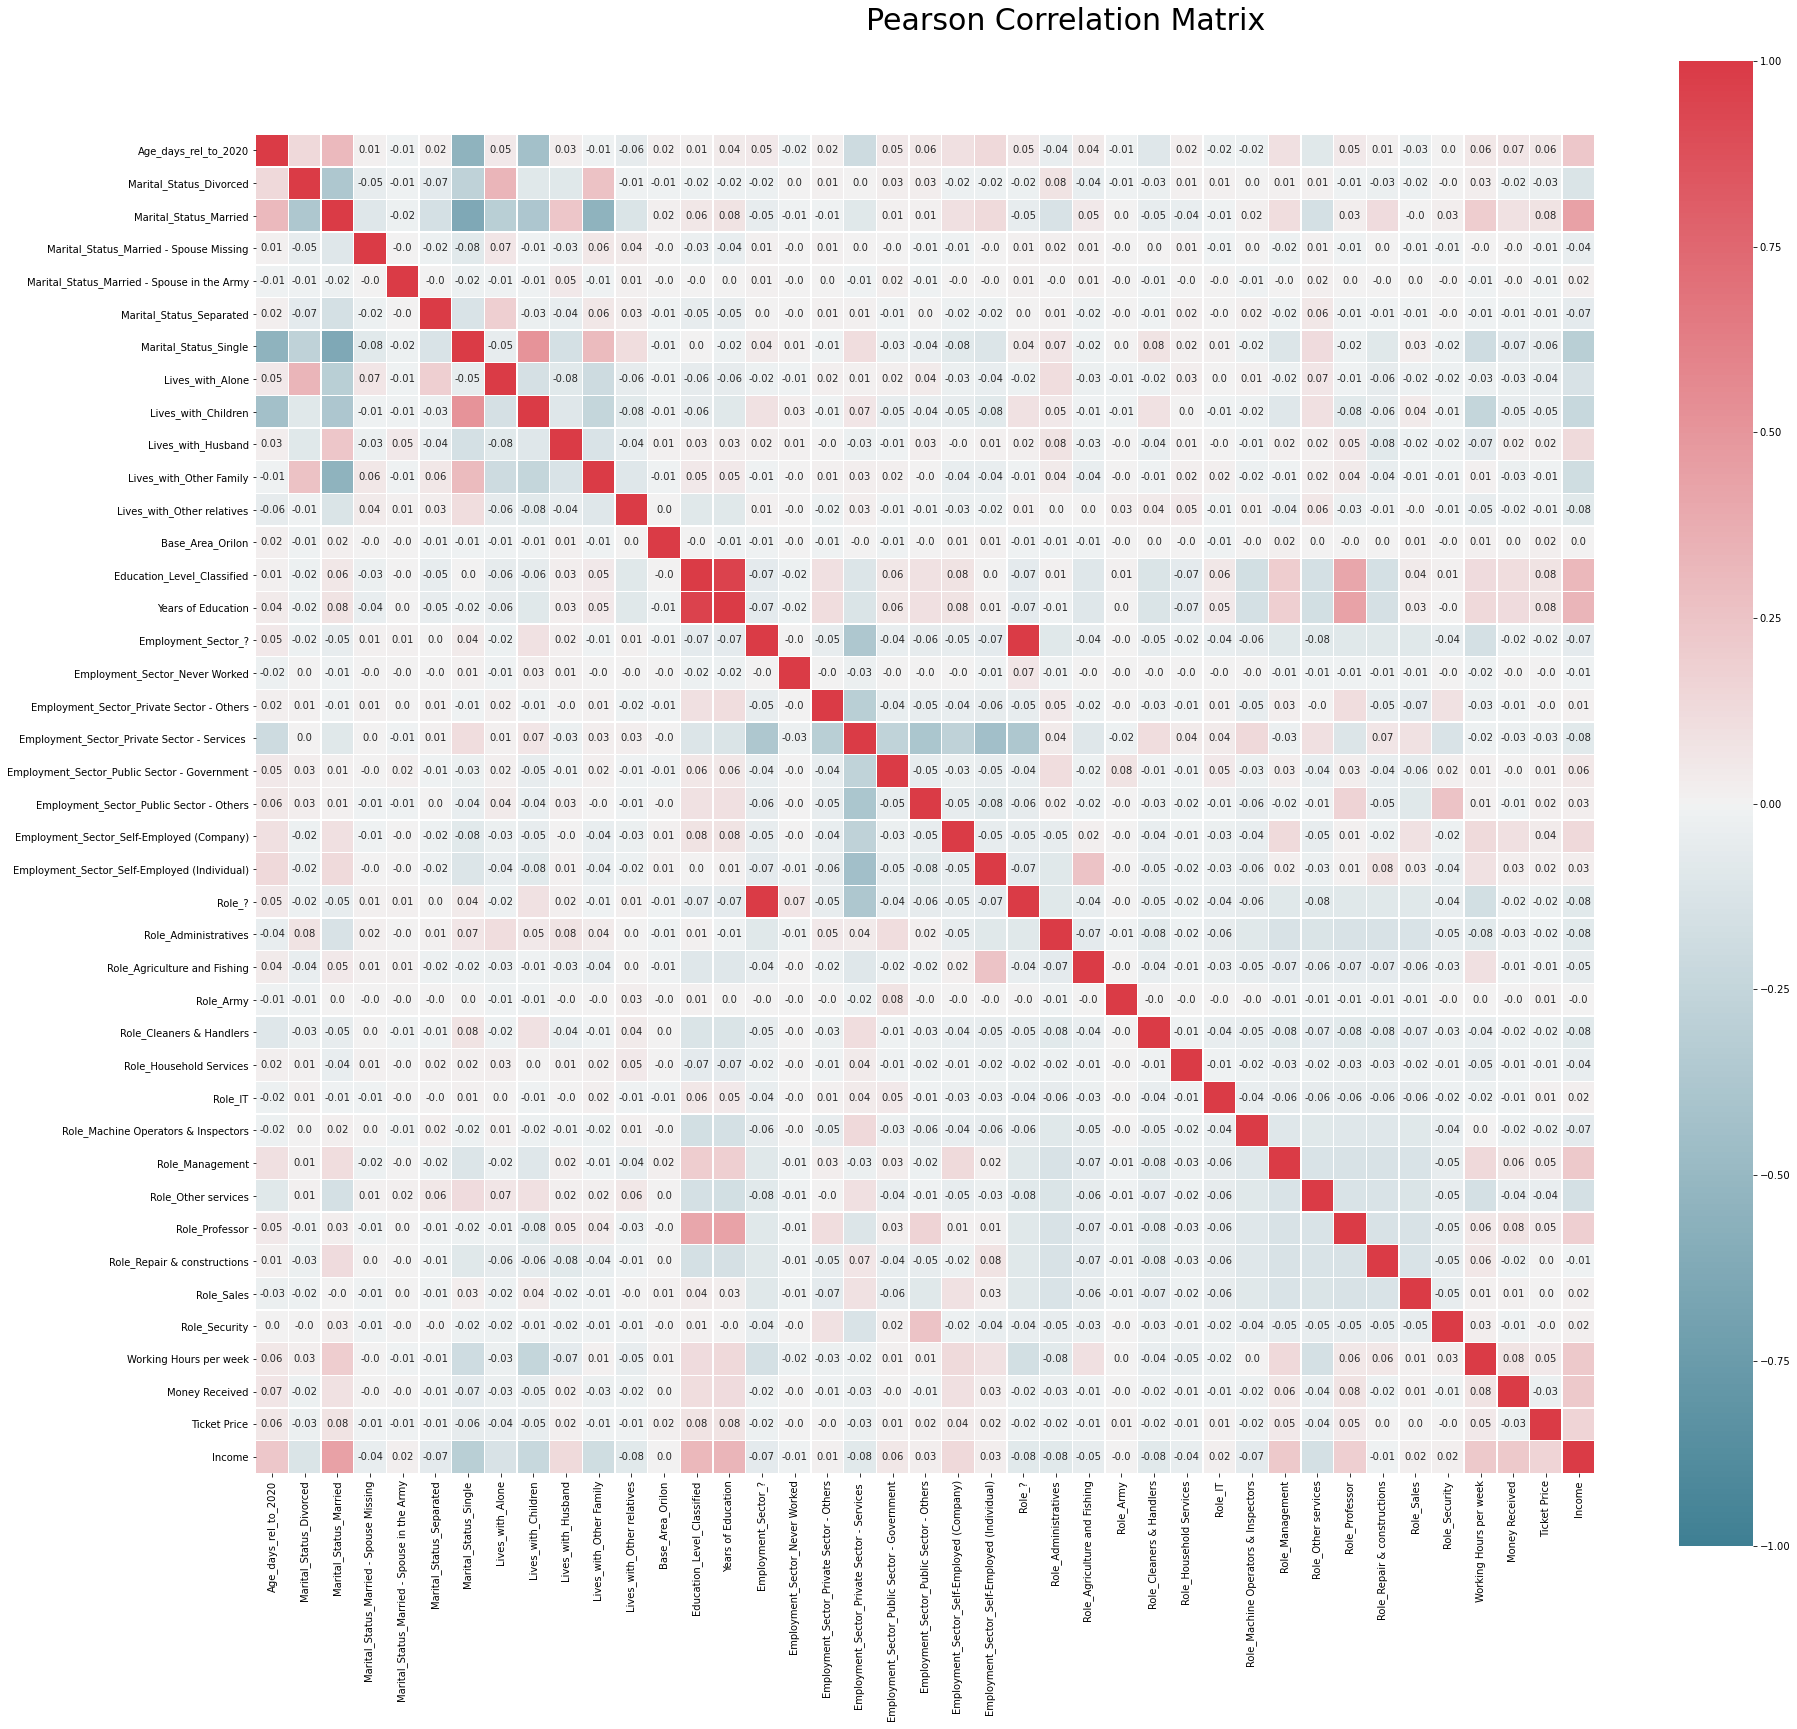

In [101]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(30, 25))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.08
mask_annot = np.absolute(corr_rounded.values) <= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=30)

plt.show()

In [102]:
# Compute the spearman correlation matrix of 'train_data'
corr_spearman = train_data_scaled_target.corr(method='spearman')

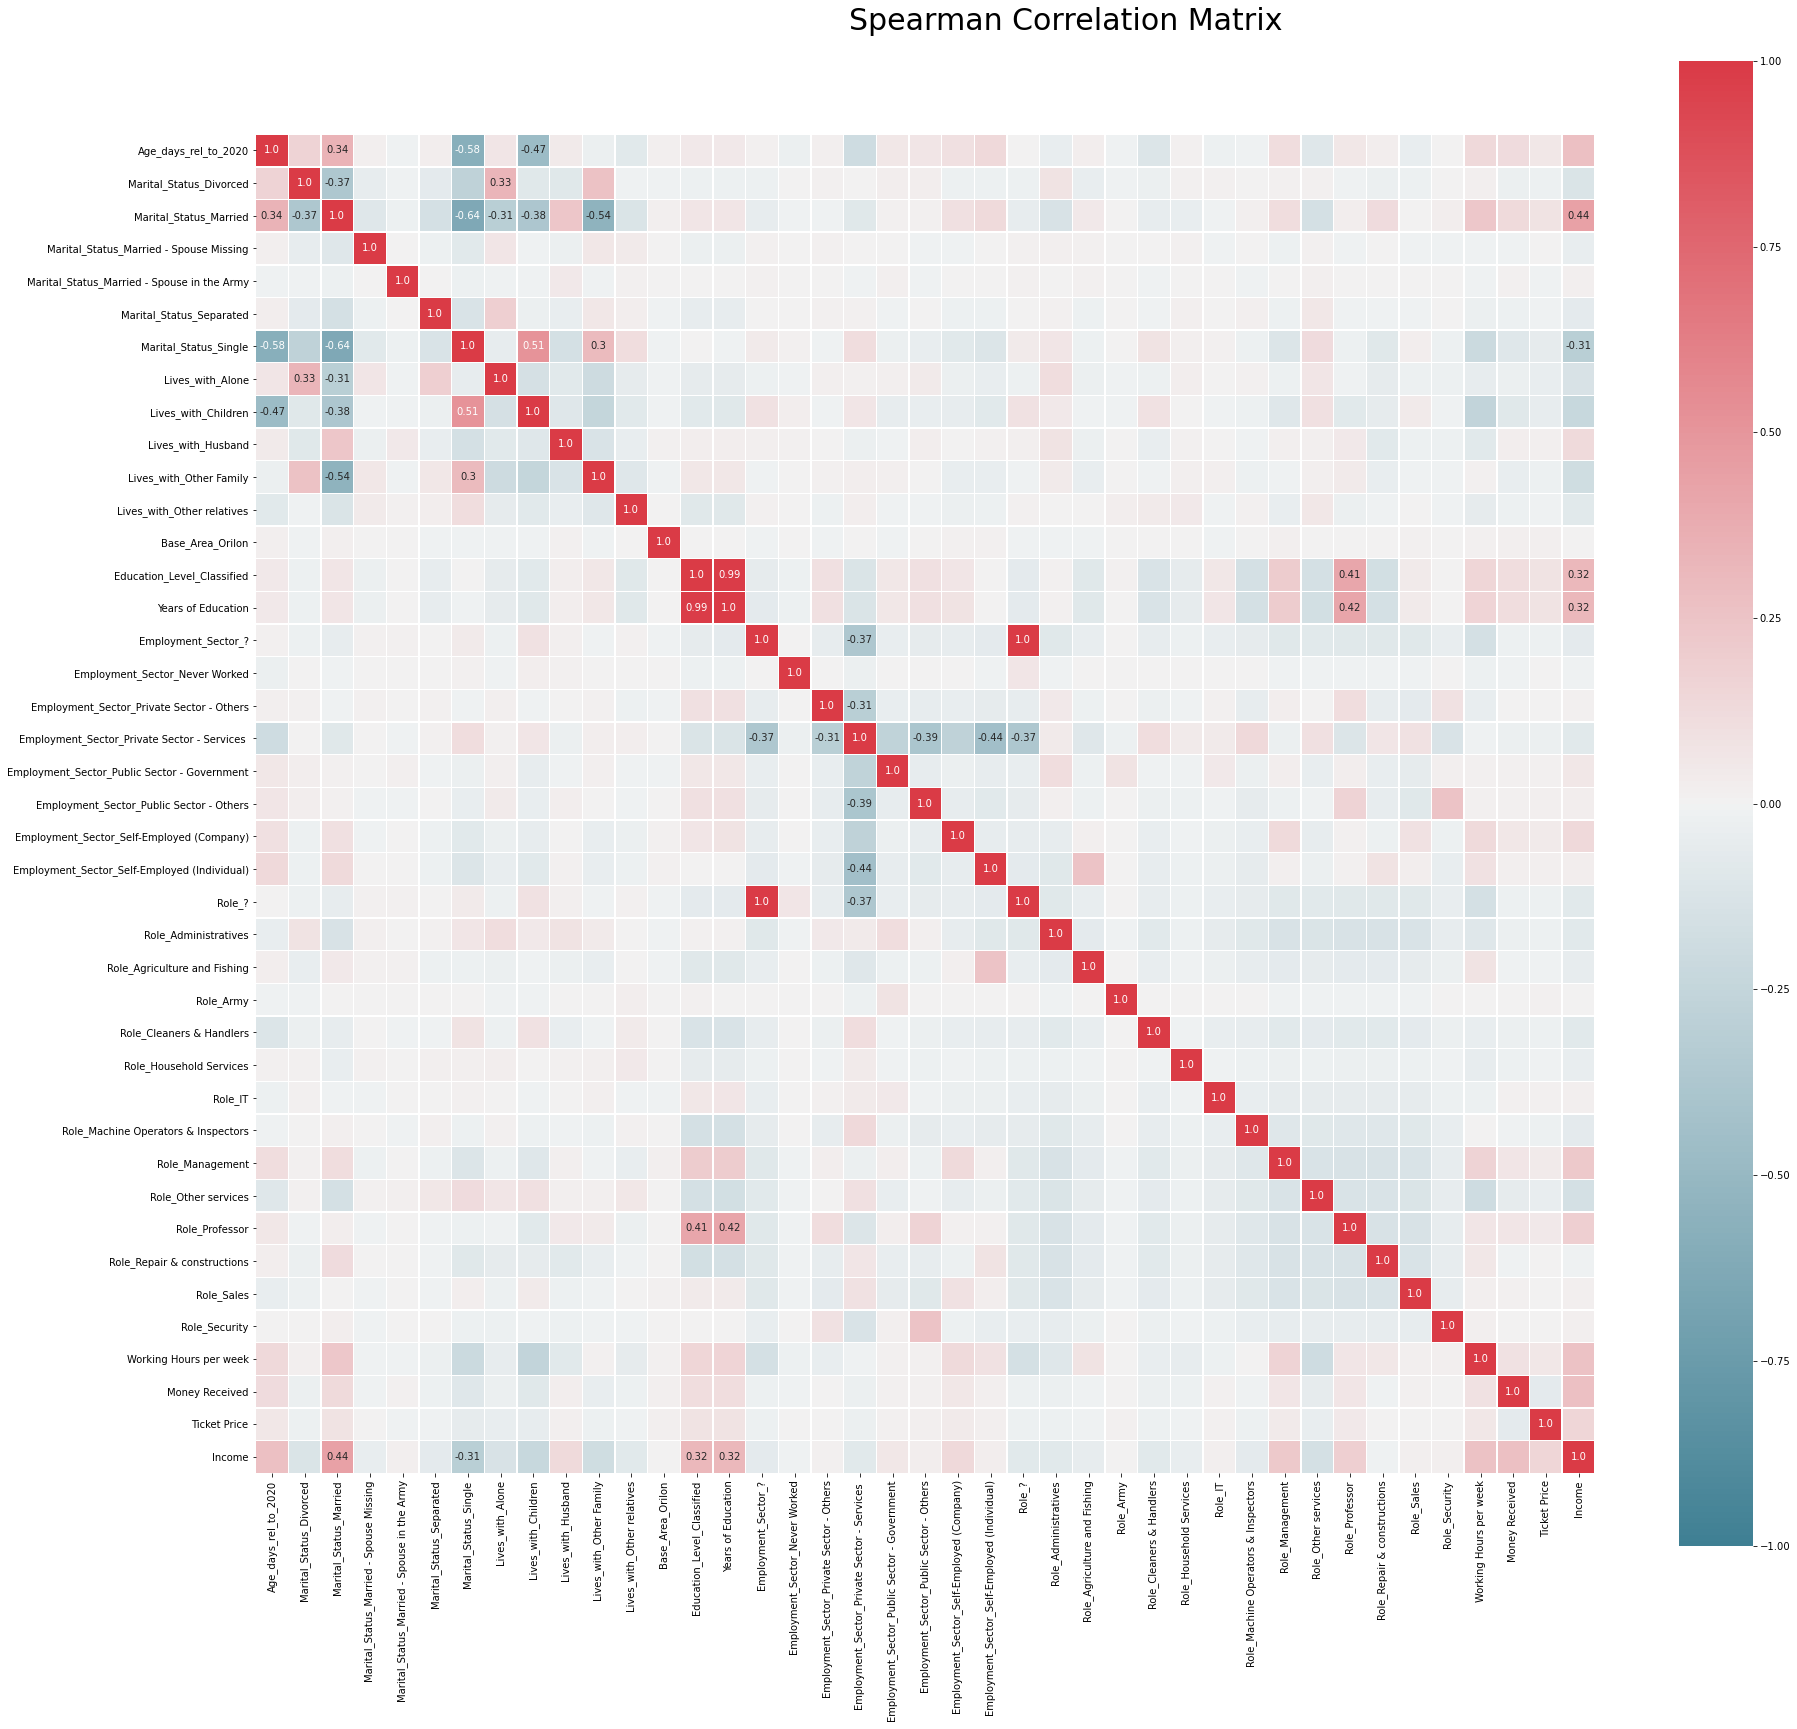

In [103]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(30, 25))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_spearman, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.3
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=30)

plt.show()

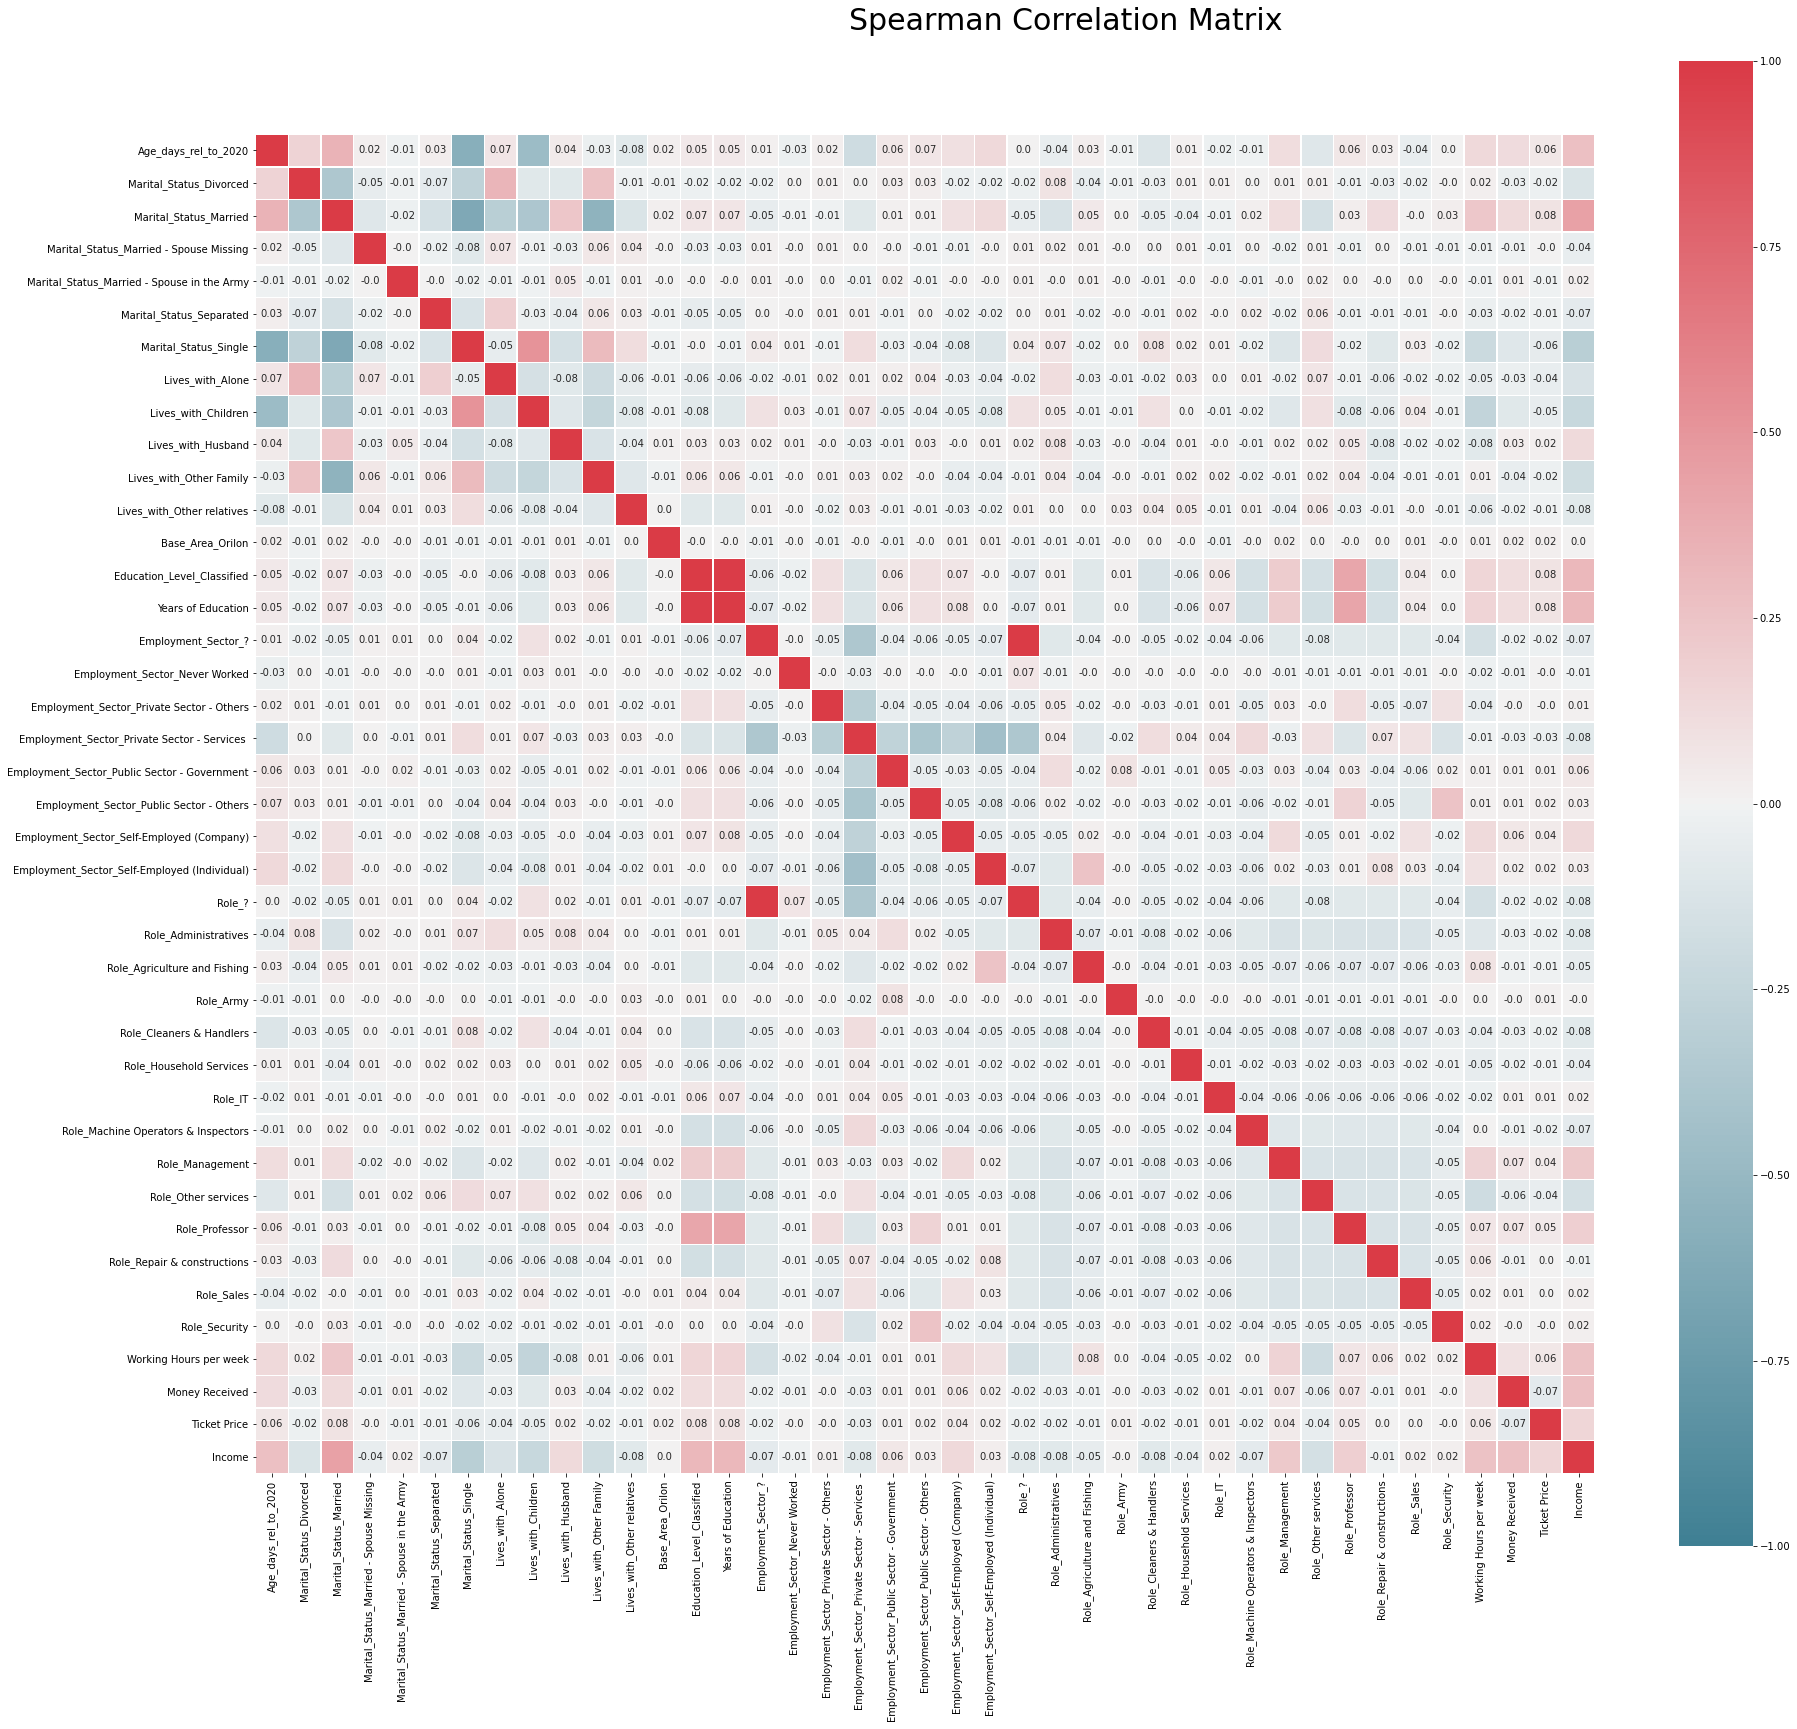

In [104]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(30, 25))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_spearman, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.08
mask_annot = np.absolute(corr_rounded.values) <= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=30)

plt.show()

From the analysis of the plots above we can always remove one of two highly correlated features, in order not to bring redundancy to our model.

High Correlations:
1. Role_? / Employment_Sector_? --> corr = 1
2. Years_of_Education / Edu_Level_Classified --> corr = 0.96
3. Marital_Status_Married / Marital_Status_Single --> corr = -0.64

From these pairs we'll try keeping:
1. Role - It has higher correlation to our target variable
2. Edu_Level_Classified - It is more clearly informative and accurate
3. Marital_Status_Married - It has higher correlation to our target variable

At this point we're also eliminating features that have a correlation to the target lower than 0.1.

As a result of this, we end up with 16 features.

In [105]:
# Create a list with the features to keep now based on the matrices
features_to_keep_1 = ['Age_days_rel_to_2020',
                    'Marital_Status_Married',
                    'Marital_Status_Single',
                    'Marital_Status_Divorced',
                    'Lives_with_Children',
                    'Lives_with_Husband',
                    'Lives_with_Alone',
                    'Lives_with_Other Family',
                    'Role_Management',
                    'Role_Other services',
                    'Role_?',
                    'Role_Administratives',
                    'Role_Cleaners & Handlers',
                    'Role_Professor',
                    'Working Hours per week',
                    'Money Received',
                    'Ticket Price',
                    'Education_Level_Classified',
                    'Employment_Sector_Self-Employed (Company)',
                    'Employment_Sector_Private Sector - Services '
                   ]

In [106]:
# Create a dataset with those features
train_data_selected_1 = train_data_scaled[features_to_keep_1]

### RFE 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#no of features
nof_list=np.arange(1,len(train_data_selected_1.columns)+1)  
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    # we are going to see in the next class this "train_test_split()"...
    X_train, X_test, y_train, y_test = train_test_split(train_data_selected_1, train_target, test_size = 0.2, random_state = 0)
    
    model = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 300,
                                        min_samples_split = 8,
                                        min_samples_leaf = 3,
                                        max_depth = 3,
                                        max_features = None,
                                        random_state = 42)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
# Create the rfe instance with the speficied optimal number of features
rfe = RFE(estimator = model, n_features_to_select = nof)

In [ ]:
# Fit and transform that instance applying it to our data
X_rfe = rfe.fit_transform(X = train_data_selected_1, y = train_target)

In [ ]:
# Check which features were selected
selected_features = pd.Series(rfe.support_, index = train_data_selected_1.columns)
selected_features

In [ ]:
# See the results in a dataframe
selected_features = pd.DataFrame(rfe.support_, index = train_data_selected_1.columns)
selected_features.columns = ['Important']
selected_features

### Ridge Classifier

In [112]:
# Adapted from 'Tugas - Feature Selection'
# Using a Ridge Classfier to inspect feature importance
ridge = RidgeClassifierCV().fit(X = train_data_selected_1,y = train_target)
coef_ridge = pd.Series(ridge.coef_[0], index = train_data_selected_1.columns)

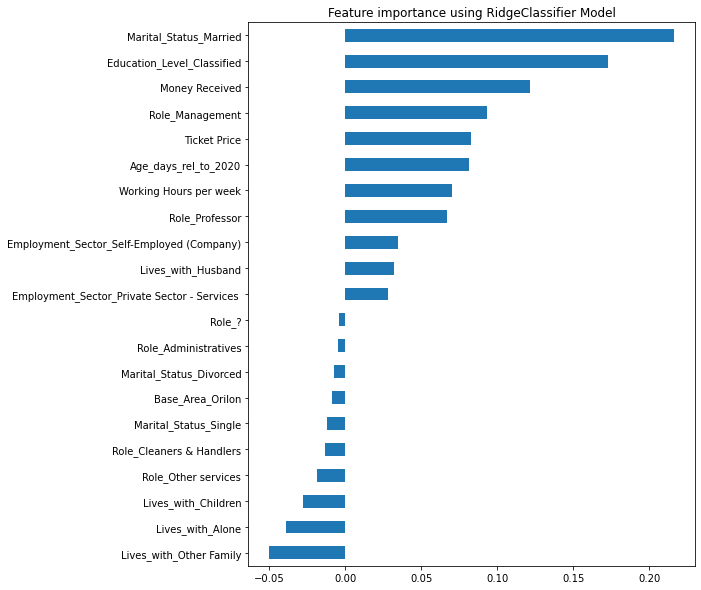

In [113]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
plot_importance(coef_ridge,'RidgeClassifier')

### XGBoost

[0.01306814 0.00607075 0.50481343 0.00870498 0.00608973 0.06214646
 0.01561921 0.00931379 0.00852342 0.03010553 0.05098516 0.00905656
 0.01495359 0.028541   0.0233025  0.0134243  0.07895938 0.03452172
 0.05993068 0.01255281 0.00931669]


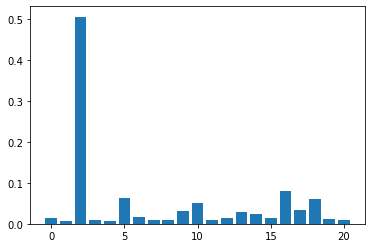

In [114]:
# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(train_data_selected_1, train_target)

# Check feature importance
print(model.feature_importances_)

# Inspect result with a plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

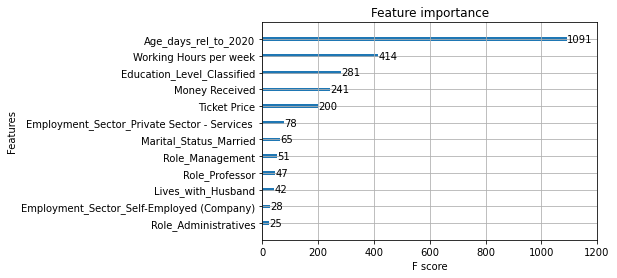

In [115]:
# Create an instance called model with a XGBoost Classifier
model = XGBClassifier()

# Fit the model to our data
model.fit(train_data_selected_1, train_target)

# Inspect result with a plot
xgb_plot_imp(model, max_num_features = 12)
plt.show()

Based on our 3 methods of feature selection we will keep the ones we had but eliminate:

1. Role_?


In [273]:
# Create a new list with the features to keep now based on the matrices
features_to_keep_2 = ['Age_days_rel_to_2020',
                    'Marital_Status_Married',
                    'Marital_Status_Single',
                    'Marital_Status_Divorced',
                    'Lives_with_Children',
                    'Lives_with_Husband',
                    'Lives_with_Alone',
                    'Lives_with_Other Family',
                    'Role_Management',
                    'Role_Other services',
                    'Role_Administratives',
                    'Role_Cleaners & Handlers',
                    'Role_Professor',
                    'Working Hours per week',
                    'Money Received',
                    'Ticket Price',
                    'Education_Level_Classified',
                    'Employment_Sector_Self-Employed (Company)',
                    'Employment_Sector_Private Sector - Services '
                ]

In [226]:
# Create a new dataset with the features we selected
train_data_selected_2 = train_data_scaled[features_to_keep_2]

### Feature selection based on MLP classifier

In [895]:
# Define some handy functions

def listAdd(list_, string):
    set_ = set(list_)
    set_.add(string)
    return list(set_)

def listRemove(list_, string):
    set_ = set(list_)
    set_.remove(string)
    return list(set_)

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__
    
def update_features(feature, current_features, candidates):
    current_features = listAdd(current_features, feature)
    candidates = listRemove(candidates, feature)
    return current_features, candidates

In [896]:
def building_df(current_features, candidates):
    """Adapt model in this function (at the bottom)!
    Runs 'show_results_intern' with every feature candidate and builds a dataframe with the results."""
    
    # Create a dataframe for results
    results_df = pd.DataFrame(columns=['Time','Train','Test', 'Iterations'])

    # Define the index
    index = []
    for feature in candidates:
        index = index + ['+' + ' ' + feature]
    
    for iteration, feature in enumerate(candidates):
        print('Candidate', iteration)
        features_to_use_this_iteration = current_features + [feature]
        print('Features used in this iteration:')
        print(features_to_use_this_iteration)
        print('')
        X = train_data[features_to_use_this_iteration]
        df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = [index[iteration]])
        model = MLPClassifier()
        df = show_results_intern(df, (model,True))
        results_df = results_df.append(df)
    return results_df

In [897]:
def building_df_removing_feature(current_features, candidates):
    """Adapt model in this function (at the bottom)!
    Runs 'show_results_intern' with every feature candidate and builds a dataframe with the results."""
    
    # Create a dataframe for results
    results_df = pd.DataFrame(columns=['Time','Train','Test', 'Iterations'])

    # Define the index
    index = []
    for feature in candidates:
        index = index + ['-' + ' ' + feature]
    
    for iteration, feature in enumerate(candidates):
        print(feature)
        print('Candidate to remove', iteration)
        features_to_use_this_iteration = listRemove(current_features, feature)
        print('Features used in this iteration:')
        print(features_to_use_this_iteration)
        print('')
        X = train_data_scaled[features_to_use_this_iteration]
        df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = [index[iteration]])
        model = MLPClassifier()
        df = show_results_intern(df, (model,True))
        results_df = results_df.append(df)
    return results_df

In [207]:
# Use this function to test different parameters and features and assess their results
# Create avg_score_intern to check for each model
def avg_score_intern(model_iterations_boolean_pair):
    
    oversampling = False
    n_splits = 10
    print_info = False
    
    model = model_iterations_boolean_pair[0]
    if print_info:
        print(model)
    
    # apply kfold
    kf = KFold(n_splits=n_splits)
    # kf = RepeatedKFold(n_splits = n_splits, n_repeats = 10, random_state = 42)
    
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    n_iter = []
    
    split_counter = 0
    
    for train_index, test_index in kf.split(X):
        
        # get the indices of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Print the KFold step
        split_counter = split_counter + 1
        if print_info:
            print('KFold step', split_counter)
        
        if oversampling:
            
            if split_counter==1:
                # Check class distribution before random oversampling
                print('Before random sampling:')
                class_dist(y_train)

            # Perform random oversampling using strategy 'minority', meaning that rows of the the minority target class 
            # will be randomly duplicated (with repetition) until the distribution of the two classes is equal
            X_train, y_train = rand_oversampling(X_train, y_train, 'minority')
            
            if split_counter==1:
                # Check result
                print('After random sampling:')
                class_dist(y_train)
                print('')
        
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        
        if model_iterations_boolean_pair[1]:
            n_iter.append(model.n_iter_)
    
    if print_info:
        print('----------------------------------------')
            
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test), str(avg_iter) + '+/-' + str(std_iter)

In [208]:
# Use this function to test different parametersand features and assess their results
# Create show_results_intern for each model 
def show_results_intern(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test, avg_iter = avg_score_intern(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test, avg_iter
        count+=1
    return df

In [900]:
features_certainly_to_keep = ['Age_days_rel_to_2020',
                              'Working Hours per week',
                              'Money Received',
                              'Ticket Price',
                              'Education_Level_Classified']

In [901]:
# The features that are not in features_certainly_to_keep, but in features_to_keep_1
candidates_0 = list(set(features_to_keep_1) - set(features_certainly_to_keep))

In [902]:
# The current features
current_features_0 = features_certainly_to_keep

In [903]:
# Define our y
y = train_target

#### Base case. Only 'features_certainly_to_keep'

In [904]:
# Base case
X = train_data_scaled[current_features_0]
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['base (features_certainly_to_keep)'])
model = MLPClassifier()
results_MLP_base = show_results_intern(df, (model,True))
results_MLP_base

,Time,Train,Test,Iterations
base (features_certainly_to_keep),16.689+/-4.31,0.831+/-0.0,0.83+/-0.01,182.8+/-15.4


In [905]:
# results_MLP_base.to_excel("results_MLP_10_fold_base.xlsx")

#### 'features_to_keep_1'

In [906]:
X = train_data_scaled[features_to_keep_1]
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ["'features_to_keep_1'"])
model = MLPClassifier()
results_MLP_f_t_k_1 = show_results_intern(df, (model,True))
results_MLP_f_t_k_1

,Time,Train,Test,Iterations
'features_to_keep_1',18.404+/-2.92,0.866+/-0.0,0.851+/-0.01,197.0+/-9.0


In [907]:
# results_MLP_f_t_k_1.to_excel("results_MLP_10_fold_f_t_k_1.xlsx")

#### All features

In [908]:
X = train_data_scaled
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['All features ('')'])
model = MLPClassifier()
results_MLP_all = show_results_intern(df, (model,True))
results_MLP_all

,Time,Train,Test,Iterations
All features (),2.989+/-0.13,1.0+/-0.0,1.0+/-0.0,29.7+/-0.6


Overfitting and no increase in Test accuracy.

In [909]:
# results_MLP_all.to_excel("results_MLP_10_fold_all.xlsx")

#### Start with 'train_data_scaled'[features_to_keep_1] and reduce number of features by one in each iteration, always removing one randomly

In [ ]:
num_iter = 6

y = train_target

acc_train_array_mlp = np.empty((0,20), dtype=float)
acc_val_array_mlp = np.empty((0,20), dtype=float)

for j in range(num_iter):
    
    print('Iteration',j)

    X = train_data_scaled[features_to_keep_1]
    
    acc_train = []
    acc_val = []

    for i in range(X.shape[1]):
        if i != 0:
            remove_ = random.choice(list(X))
            one_less_feat = listRemove(list(X), remove_)
            # print(one_less_feat)
            # print('')
            X = X[one_less_feat]

        model = MLPClassifier()
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, shuffle = True, stratify = y)
        model.fit(X_train, y_train)
        # check the mean accuracy for the train
        acc_train_ = model.score(X_train, y_train)
        # check the mean accuracy for the test
        acc_val_ = model.score(X_val,y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        acc_train.append(acc_train_)
        acc_val.append(acc_val_)

    acc_train_arr = np.transpose(np.array(acc_train))
    acc_val_arr = np.transpose(np.array(acc_val))
    acc_train_array_mlp = np.append(acc_train_array_mlp, [acc_train_arr], axis=0)
    acc_val_array_mlp = np.append(acc_val_array_mlp, [acc_val_arr], axis=0)

Iteration 0
Iteration 1
Iteration 2


In [ ]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(acc_val_array_mlp[0],c='b',label='Run 1')
ax.plot(acc_val_array_mlp[1],c='g',label='Run 2')
ax.plot(acc_val_array_mlp[2],c='k',label='Run 3')
ax.plot(acc_val_array_mlp[3],c='r',label='Run 4')
ax.plot(acc_val_array_mlp[4],c='c',label='Run 5')
ax.plot(acc_val_array_mlp[5],c='c',label='Run 6')

plt.legend(loc=3)
plt.title('MLP Classifier')
plt.xlabel('Number of randomly dropped features')
plt.ylabel('Validation accuracy')
plt.draw()

#### Plot V2

In [ ]:
# Adapted from Data Mining Lab 'Data Visualisation'
sns.set()

fig, axes = plt.subplots(2, 3, figsize=(20, 13))

# Plot data
for i, ax in enumerate(axes.flatten()):
    if i < acc_val_array_mlp.shape[0]:
        sns.lineplot(x = list(range(1, acc_train_array_mlp.shape[1] + 1)), y = acc_train_array_mlp[i], ax=ax, color='b', label='Training')
        sns.lineplot(x = list(range(1, acc_val_array_mlp.shape[1] + 1)), y = acc_val_array_mlp[i], ax=ax, color='r', label='Validation')
        ax.set_xlabel('Number of randomly dropped features', fontsize=15)
        ax.set_ylabel('Classification accuracy', fontsize=15)
        axtitle = 'Run' + ' ' + str(i+1)
        ax.set_title(axtitle, fontsize=20)
        plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
        
title = 'MLP Classifier - randomly dropping one feature in each iteration'
plt.suptitle(title, y = 0.95, fontsize=30)

#### --------------------------------------------------------------------------------------------------------------

### Feature selection based on AdaBoost classifier

In [ ]:
# Base case
X = train_data_scaled[current_features_0]
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['base (features_certainly_to_keep)'])
model = AdaBoostClassifier()
results_ABC_base = show_results_intern(df, (model,False))
results_ABC_base

#### Iteratively add features (Not used in the end. Next two cells are not used.)

In [ ]:
if False:
    results_ABC_iteration_1 = building_df(current_features_0, candidates_0)
    results_ABC_iteration_1

In [ ]:
if False:
    results_ABC_iteration_1.to_excel("results_ABC_10_fold_10_times_iteration_1.xlsx")

#### Try with all features from 'features_to_keep_1'

In [ ]:
X = train_data_scaled[features_to_keep_1]
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['All of features_to_keep_1'])
model = AdaBoostClassifier()
results_ABC_keep_1 = show_results_intern(df, (model,False))
results_ABC_keep_1

More features increase performance.

#### Try with all features ('train_data_scaled')

In [ ]:
X = train_data_scaled
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['All of train_data_scaled'])
model = AdaBoostClassifier()
results_ABC_keep_1 = show_results_intern(df, (model,False))
results_ABC_keep_1

Not much improvement on the test set and some overfitting.

#### Start with 'train_data_scaled'[features_to_keep_1] and reduce number of features by one in each iteration, always removing one randomly

In [ ]:
num_iter = 6

y = train_target

acc_train_array_ada = np.empty((0,20), dtype=float)
acc_val_array_ada = np.empty((0,20), dtype=float)

for j in range(num_iter):
    
    print('Iteration',j)

    X = train_data_scaled[features_to_keep_1]
    
    acc_train = []
    acc_val = []

    for i in range(X.shape[1]):
        if i != 0:
            remove_ = random.choice(list(X))
            one_less_feat = listRemove(list(X), remove_)
            # print(one_less_feat)
            # print('')
            X = X[one_less_feat]

        model = AdaBoostClassifier()
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, shuffle = True, stratify = y)
        model.fit(X_train, y_train)
        # check the mean accuracy for the train
        acc_train_ = model.score(X_train, y_train)
        # check the mean accuracy for the test
        acc_val_ = model.score(X_val,y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        acc_train.append(acc_train_)
        acc_val.append(acc_val_)

    acc_train_arr = np.transpose(np.array(acc_train))
    acc_val_arr = np.transpose(np.array(acc_val))
    acc_train_array_ada = np.append(acc_train_array_ada, [acc_train_arr], axis=0)
    acc_val_array_ada = np.append(acc_val_array_ada, [acc_val_arr], axis=0)

In [ ]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(acc_val_array_ada[0],c='b',label='Run 1')
ax.plot(acc_val_array_ada[1],c='g',label='Run 2')
ax.plot(acc_val_array_ada[2],c='k',label='Run 3')
ax.plot(acc_val_array_ada[3],c='r',label='Run 4')
ax.plot(acc_val_array_ada[4],c='c',label='Run 5')
ax.plot(acc_val_array_ada[5],c='c',label='Run 6')

plt.legend(loc=3)
plt.title('AdaBoost')
plt.xlabel('Number of randomly dropped features')
plt.ylabel('Validation accuracy')
plt.draw()

#### Plot V2

In [ ]:
# Adapted from Data Mining Lab 'Data Visualisation'
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, 3, figsize=(20, 13))

# Plot data
for i, ax in enumerate(axes.flatten()):
    if i < acc_val_array_ada.shape[0]:
        sns.lineplot(x = list(range(1, acc_train_array_ada.shape[1] + 1)), y = acc_train_array_ada[i], ax=ax, color='b', label='Training')
        sns.lineplot(x = list(range(1, acc_val_array_ada.shape[1] + 1)), y = acc_val_array_ada[i], ax=ax, color='r', label='Validation')
        ax.set_xlabel('Number of randomly dropped features', fontsize=15)
        ax.set_ylabel('Classification accuracy', fontsize=15)
        axtitle = 'Run' + ' ' + str(i+1)
        ax.set_title(axtitle, fontsize=20)
        plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
        
title = 'AdaBoost classifier - randomly dropping one feature in each iteration'
plt.suptitle(title, y = 0.95, fontsize=30)

## Model selection

We will try different models, and for each model we will also apply different parameters. In the end we will check which model gives us better insights within each models best parameter choice collection.

### AdaBoost with train_data_scaled

In [190]:
X_train = train_data_scaled.copy()
y_train = train_target.copy()

#### Make a rough search

In [176]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [50, 100, 200, 300, 400, 500, 600, 700, 800],
                       'learning_rate' : [0.1, 0.3, 0.6, 0.9, 0.95, 1],
                       'algorithm' : ['SAMME.R', 'SAMME'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
 'learning_rate': [0.1, 0.3, 0.6, 0.9, 0.95, 1],
 'algorithm': ['SAMME.R', 'SAMME'],
 'random_state': [42]}

In [177]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  5.7min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.1, 0.3, 0.6, 0.9, 0.95, 1],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700,
                                          800],
                         'random_state': [42]},
             verbose=5)

In [178]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.95,
 'n_estimators': 500,
 'random_state': 42}

#### Search in the regions of the best values

In [179]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [450, 475, 500, 525, 550],
                       'learning_rate' : [0.925, 0.95, 0.975],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [450, 475, 500, 525, 550],
 'learning_rate': [0.925, 0.95, 0.975],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [181]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  1.0min remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.925, 0.95, 0.975],
                         'n_estimators': [450, 475, 500, 525, 550],
                         'random_state': [42]},
             verbose=5)

In [182]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.95,
 'n_estimators': 500,
 'random_state': 42}

#### Searching even more closely

In [183]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [490, 500, 510],
                       'learning_rate' : [0.94, 0.95, 0.96],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [490, 500, 510],
 'learning_rate': [0.94, 0.95, 0.96],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [184]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   35.5s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:   36.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   42.5s finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.94, 0.95, 0.96],
                         'n_estimators': [490, 500, 510],
                         'random_state': [42]},
             verbose=5)

In [185]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.96,
 'n_estimators': 510,
 'random_state': 42}

#### More closely...

In [186]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [502, 504, 506, 508, 510],
                       'learning_rate' : [0.955, 0.96, 0.965],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [502, 504, 506, 508, 510],
 'learning_rate': [0.955, 0.96, 0.965],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [187]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:   58.6s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.955, 0.96, 0.965],
                         'n_estimators': [502, 504, 506, 508, 510],
                         'random_state': [42]},
             verbose=5)

In [188]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.96,
 'n_estimators': 508,
 'random_state': 42}

### Test the model with the best parameters

In [331]:
X_train = train_data_scaled.copy()
y_train = train_target.copy()

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42, shuffle = True, stratify = y_train)

In [332]:
model = AdaBoostClassifier(n_estimators=508, 
                           learning_rate=0.96, 
                           algorithm='SAMME.R', 
                           random_state=42)

In [333]:
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.96, n_estimators=508, random_state=42)

In [334]:
val_pred = model.predict(X_val)

In [335]:
metrics.f1_score(y_val,val_pred,average='micro')

0.8678571428571429

In [336]:
metrics.accuracy_score(y_val,val_pred)

0.8678571428571429

### AdaBoost with train_data_scaled[features_to_keep_1]

In [300]:
X_train = train_data_scaled[features_to_keep_1]
y_train = train_target

#### Make a rough search

In [303]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [50, 100, 200, 300, 400, 500, 600, 700, 800],
                       'learning_rate' : [0.1, 0.3, 0.6, 0.9, 0.95, 1],
                       'algorithm' : ['SAMME.R', 'SAMME'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
 'learning_rate': [0.1, 0.3, 0.6, 0.9, 0.95, 1],
 'algorithm': ['SAMME.R', 'SAMME'],
 'random_state': [42]}

In [304]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  4.7min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [0.1, 0.3, 0.6, 0.9, 0.95, 1],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700,
                                          800],
                         'random_state': [42]},
             verbose=5)

In [305]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.6,
 'n_estimators': 800,
 'random_state': 42}

#### Search in the regions of the best values - especially checking if n_estimators should be higher

In [306]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [800, 900],
                       'learning_rate' : [0.5, 0.6, 0.7],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [800, 900],
 'learning_rate': [0.5, 0.6, 0.7],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [307]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   14.6s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   27.8s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   28.0s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   35.7s finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.5, 0.6, 0.7],
                         'n_estimators': [800, 900], 'random_state': [42]},
             verbose=5)

In [308]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.6,
 'n_estimators': 900,
 'random_state': 42}

#### Searching even more closely and checking if n_estimators should be even higher

In [312]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [900, 1000],
                       'learning_rate' : [0.58, 0.6, 0.62],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [900, 1000],
 'learning_rate': [0.58, 0.6, 0.62],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [313]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   16.0s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   31.0s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   31.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   39.6s finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.58, 0.6, 0.62],
                         'n_estimators': [900, 1000], 'random_state': [42]},
             verbose=5)

In [314]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.62,
 'n_estimators': 1000,
 'random_state': 42}

#### More closely...

In [315]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [950, 1000, 1050],
                       'learning_rate' : [0.61, 0.62, 0.63],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [950, 1000, 1050],
 'learning_rate': [0.61, 0.62, 0.63],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [316]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   49.8s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:   51.9s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.0min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.61, 0.62, 0.63],
                         'n_estimators': [950, 1000, 1050],
                         'random_state': [42]},
             verbose=5)

In [317]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.61,
 'n_estimators': 950,
 'random_state': 42}

#### Even more closely...

In [318]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [940, 950, 960],
                       'learning_rate' : [0.6, 0.61],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [940, 950, 960],
 'learning_rate': [0.6, 0.61],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [319]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   15.8s remaining:   24.9s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   31.4s remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   32.0s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   40.6s finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [0.6, 0.61],
                         'n_estimators': [940, 950, 960],
                         'random_state': [42]},
             verbose=5)

In [320]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.61,
 'n_estimators': 960,
 'random_state': 42}

#### Even more closely... (2)

In [343]:
# Initialise the model to be used
model_abc = AdaBoostClassifier()

# Create the parameter space
parameter_space_abc = {'n_estimators' : [960, 961, 962, 963],
                       'learning_rate' : [0.61],
                       'algorithm' : ['SAMME.R'],
                       'random_state' : [42]}

# Check the parameters
parameter_space_abc

{'n_estimators': [960, 961, 962, 963],
 'learning_rate': [0.61],
 'algorithm': ['SAMME.R'],
 'random_state': [42]}

In [344]:
# Create the GridSearch instance with our parameters
grid_abc = GridSearchCV(model_abc, 
                        parameter_space_abc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_abc.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   16.0s remaining:   47.9s
[Parallel(n_jobs=-1)]: Done   6 out of  12 | elapsed:   16.1s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:   26.4s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   26.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   26.5s finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [0.61],
                         'n_estimators': [960, 961, 962, 963],
                         'random_state': [42]},
             verbose=5)

In [345]:
# Show the best parameter set
grid_abc.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.61,
 'n_estimators': 962,
 'random_state': 42}

### Test the model with the best parameters

In [363]:
X_train = train_data_scaled[features_to_keep_1]
y_train = train_target

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42, shuffle = True, stratify = y_train)

In [369]:
model = AdaBoostClassifier(n_estimators=962, 
                           learning_rate=0.61, 
                           algorithm='SAMME.R', 
                           random_state=42)

In [370]:
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.61, n_estimators=962, random_state=42)

In [371]:
val_pred = model.predict(X_val)

In [372]:
metrics.f1_score(y_val,val_pred,average='micro')

0.8676339285714286

In [373]:
metrics.accuracy_score(y_val,val_pred)

0.8676339285714286

#### -------------------------------------------------------------------------------------

### Multi Layer Perceptron with train_data_scaled

In [227]:
X_train = train_data_scaled.copy()
y_train = train_target.copy()

##### Make a rough search

In [223]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(8,), (10,), (12,), (6, 6), (10, 10), (6, 6, 6), (10, 10, 10)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2],
    'learning_rate': ['constant','adaptive'],
    'alpha': [0.0001, 0.001],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(8,),
  (10,),
  (12,),
  (6, 6),
  (10, 10),
  (6, 6, 6),
  (10, 10, 10)],
 'activation': ['tanh', 'relu', 'logistic'],
 'solver': ['sgd', 'adam', 'lbfgs'],
 'learning_rate_init': [0.001, 0.01, 0.1, 0.2],
 'learning_rate': ['constant', 'adaptive'],
 'alpha': [0.0001, 0.001],
 'random_state': [42]}

#### Rules of thumb:

The number of hidden neurons should be between the size of the input layer and the size of the output layer
The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
The number of hidden neurons should be less than twice the size of the input layer

We have 39 input neurons. And 2 output neurons.
39 * 2/3 + 2 = 28
2 * 39 = 78

#### This was searched and found by Henrique:
    
parameter_space_mlp = {
'hidden_layer_sizes': [(100,), (6, 6), (6,), (50, 50)],
'activation': ['tanh', 'relu', 'logistic'],
'solver': ['sgd', 'adam', 'lbfgs'],
'learning_rate_init': [0.001, 0.01, 0.1],
'learning_rate': ['constant','adaptive'],
'alpha': [0.0001, 0.05]
}

parameter_space_mlp

----------

#Initialize the model
model = MLPClassifier(max_iter = 300)

#Create a GridSearch instance
gs_mlp = GridSearchCV(model, 
                      parameter_space_mlp, 
                      n_jobs = -1,
                      cv = 5,
                      verbose = 4)

----------

#Fit it to our model
gs_mlp.fit(X_train, y_train)

best_mlp_grid = MLPClassifier(hidden_layer_sizes=(6, 6),
                      activation = 'tanh', 
                      solver = 'lbfgs',
                      learning_rate_init = 0.01,
                      learning_rate = 'adaptive',
                      alpha = 0.0001,
                      max_iter = 5e3,
                      random_state = 42)

In [224]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 63.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed: 87.5min
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed: 102.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | el

GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(8,), (10,), (12,), (6, 6),
                                                (10, 10), (6, 6, 6),
                                                (10, 10, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1, 0.2],
                         'random_state': [42],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             verbose=5)

In [225]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (12,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'random_state': 42,
 'solver': 'adam'}

#### Make a finer search in the area of the found parameters

In [226]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(12,), (13,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.0001, 0.001],
    'learning_rate': ['constant','adaptive'],
    'alpha': [0.001, 0.01],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(12,), (13,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.0001, 0.001],
 'learning_rate': ['constant', 'adaptive'],
 'alpha': [0.001, 0.01],
 'random_state': [42]}

In [229]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.8min finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(12,), (13,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.0001, 0.001],
                         'random_state': [42], 'solver': ['adam']},
             verbose=5)

In [231]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (12,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'random_state': 42,
 'solver': 'adam'}

#### Make another finer search in the area of the found parameters

In [232]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(11,), (12,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'learning_rate': ['constant'],
    'alpha': [0.0005, 0.001, 0.0015],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(11,), (12,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.001],
 'learning_rate': ['constant'],
 'alpha': [0.0005, 0.001, 0.0015],
 'random_state': [42]}

In [233]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:  1.1min remaining:   23.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'],
                         'alpha': [0.0005, 0.001, 0.0015],
                         'hidden_layer_sizes': [(11,), (12,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'random_state': [42],
                         'solver': ['adam']},
             verbose=5)

In [234]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0015,
 'hidden_layer_sizes': (12,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'random_state': 42,
 'solver': 'adam'}

#### Even finer...

In [235]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(12,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'learning_rate': ['constant'],
    'alpha': [0.0014, 0.0015, 0.0016],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(12,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.001],
 'learning_rate': ['constant'],
 'alpha': [0.0014, 0.0015, 0.0016],
 'random_state': [42]}

In [236]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   18.9s remaining:   52.0s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   23.4s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   36.1s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   40.1s finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'],
                         'alpha': [0.0014, 0.0015, 0.0016],
                         'hidden_layer_sizes': [(12,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'random_state': [42],
                         'solver': ['adam']},
             verbose=5)

In [237]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0014,
 'hidden_layer_sizes': (12,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'random_state': 42,
 'solver': 'adam'}

#### Even finer... (check alpha)

In [238]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(12,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'learning_rate': ['constant'],
    'alpha': [0.0011, 0.0012, 0.0013, 0.0014],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(12,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.001],
 'learning_rate': ['constant'],
 'alpha': [0.0011, 0.0012, 0.0013, 0.0014],
 'random_state': [42]}

In [239]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:   34.0s remaining:   34.0s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:   42.4s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   52.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   52.2s finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'],
                         'alpha': [0.0011, 0.0012, 0.0013, 0.0014],
                         'hidden_layer_sizes': [(12,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'random_state': [42],
                         'solver': ['adam']},
             verbose=5)

In [240]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0014,
 'hidden_layer_sizes': (12,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'random_state': 42,
 'solver': 'adam'}

### Test the model with the best parameters

In [241]:
X_train = train_data_scaled.copy()
y_train = train_target.copy()

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42, shuffle = True, stratify = y_train)

In [242]:
model = MLPClassifier(
    activation = 'tanh',
    alpha = 0.0014,
    hidden_layer_sizes = (12,),
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    random_state = 42,
    solver = 'adam'
)

In [243]:
model.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0014, hidden_layer_sizes=(12,),
              random_state=42)

In [244]:
val_pred = model.predict(X_val)

In [245]:
metrics.f1_score(y_val,val_pred,average='micro')

0.853125

In [246]:
metrics.accuracy_score(y_val,val_pred)

0.853125

### Grid search for MLP with train_data_scaled[features_to_keep_1]

In [378]:
X_train = train_data_scaled[features_to_keep_1]
y_train = train_target

#### Make a rough search

In [379]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(10,), (12,), (14,), (6, 6), (10, 10), (6, 6, 6), (10, 10, 10)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
    'alpha': [0.0001, 0.001],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(10,),
  (12,),
  (14,),
  (6, 6),
  (10, 10),
  (6, 6, 6),
  (10, 10, 10)],
 'activation': ['tanh', 'relu', 'logistic'],
 'solver': ['sgd', 'adam', 'lbfgs'],
 'learning_rate_init': [0.001, 0.01],
 'learning_rate': ['constant', 'adaptive'],
 'alpha': [0.0001, 0.001],
 'random_state': [42]}

In [380]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 52.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 77.8min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed: 89.7min finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (12,), (14,), (6, 6),
                                                (10, 10), (6, 6, 6),
                                                (10, 10, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01],
                         'random_state': [42],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             verbose=5)

In [381]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'random_state': 42,
 'solver': 'adam'}

#### Make a finer search in the area of the found parameters

In [382]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(9,), (10,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.01, 0.02],
    'learning_rate': ['constant'],
    'alpha': [0.0001, 0.00015],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(9,), (10,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.01, 0.02],
 'learning_rate': ['constant'],
 'alpha': [0.0001, 0.00015],
 'random_state': [42]}

In [383]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:   33.4s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   35.7s finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001, 0.00015],
                         'hidden_layer_sizes': [(9,), (10,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.01, 0.02],
                         'random_state': [42], 'solver': ['adam']},
             verbose=5)

In [384]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'random_state': 42,
 'solver': 'adam'}

#### Make another finer search in the area of the found parameters

In [385]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(10,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.009, 0.01, 0.011],
    'learning_rate': ['constant'],
    'alpha': [0.00005, 0.0001],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(10,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.009, 0.01, 0.011],
 'learning_rate': ['constant'],
 'alpha': [5e-05, 0.0001],
 'random_state': [42]}

In [386]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   31.0s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.9s finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [5e-05, 0.0001],
                         'hidden_layer_sizes': [(10,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.009, 0.01, 0.011],
                         'random_state': [42], 'solver': ['adam']},
             verbose=5)

In [387]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 5e-05,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'random_state': 42,
 'solver': 'adam'}

#### Even finer...

In [389]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(10,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.01],
    'learning_rate': ['constant'],
    'alpha': [4e-05, 5e-05],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(10,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.01],
 'learning_rate': ['constant'],
 'alpha': [4e-05, 5e-05],
 'random_state': [42]}

In [390]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    9.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.4s finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [4e-05, 5e-05],
                         'hidden_layer_sizes': [(10,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.01], 'random_state': [42],
                         'solver': ['adam']},
             verbose=5)

In [391]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 4e-05,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'random_state': 42,
 'solver': 'adam'}

#### Even finer... (check alpha)

In [401]:
# Initialise the model to be used
model_mlp = MLPClassifier(max_iter = 1000)

# Create the parameter space
parameter_space_mlp = {
    'hidden_layer_sizes': [(10,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.01],
    'learning_rate': ['constant'],
    'alpha': [3e-05, 4e-05, 5e-05],
    'random_state': [42]
}

# Check the parameters
parameter_space_mlp

{'hidden_layer_sizes': [(10,)],
 'activation': ['tanh'],
 'solver': ['adam'],
 'learning_rate_init': [0.01],
 'learning_rate': ['constant'],
 'alpha': [3e-05, 4e-05, 5e-05],
 'random_state': [42]}

In [402]:
# Create the GridSearch instance with our parameters
grid_mlp = GridSearchCV(model_mlp, 
                        parameter_space_mlp,  
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_mlp.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    8.3s remaining:   22.8s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   11.6s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   17.0s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.0s finished


GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [3e-05, 4e-05, 5e-05],
                         'hidden_layer_sizes': [(10,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.01], 'random_state': [42],
                         'solver': ['adam']},
             verbose=5)

In [400]:
# Show the best parameter set
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 4e-05,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'random_state': 42,
 'solver': 'adam'}

### Test the model with the best parameters

In [404]:
X_train = train_data_scaled[features_to_keep_1]
y_train = train_target

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42, shuffle = True, stratify = y_train)

In [405]:
model = MLPClassifier(
    activation = 'tanh',
    alpha = 4e-05,
    hidden_layer_sizes = (10,),
    learning_rate = 'constant',
    learning_rate_init = 0.01,
    random_state = 42,
    solver = 'adam'
)

In [406]:
model.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=4e-05, hidden_layer_sizes=(10,),
              learning_rate_init=0.01, random_state=42)

In [407]:
val_pred = model.predict(X_val)

In [408]:
metrics.f1_score(y_val,val_pred,average='micro')

0.8587053571428571

In [409]:
metrics.accuracy_score(y_val,val_pred)

0.8587053571428571

#### -----------------------------------------------------------------------------------------

### Gradient Boosting Classifier

In [280]:
# Split the data
# Remember that our general feature selection process retrieved 'features_to_keep_2' 
X_train = train_data_scaled[features_to_keep_2].copy()
y_train = train_target.copy()

#### Learning Rate

In [801]:
# Set different learning rates to the models and check the results

model_lr1 = GradientBoostingClassifier(learning_rate = .1, 
                                      random_state = 42)

model_lr2 = GradientBoostingClassifier(learning_rate = .2, 
                                      random_state = 42)

model_lr3 = GradientBoostingClassifier(learning_rate = .3, 
                                      random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['LR = .1','LR = .2', 'LR = .3'])
show_results_intern(df, (model_lr1,False), (model_lr2,False), (model_lr3,False))

,Time,Train,Test,Iterations
LR = .1,2.101+/-0.39,0.867+/-0.0,0.863+/-0.01,nan+/-nan
LR = .2,2.0+/-0.11,0.874+/-0.0,0.866+/-0.01,nan+/-nan
LR = .3,2.203+/-0.23,0.877+/-0.0,0.867+/-0.01,nan+/-nan


#### Number of Estimators

In [802]:
# Set different numbers of estimators to the models and check the results

model_nesti_50 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 50,
                                        random_state = 42)

model_nesti_75 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 75,
                                        random_state = 42)

model_nesti_100 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        random_state = 42)

model_nesti_200 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 200,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['50 esti' ,'75 esti', '100 esti','200 esti'])
show_results_intern(df, (model_nesti_50,False), (model_nesti_75,False), (model_nesti_100,False),  (model_nesti_200,False))

,Time,Train,Test,Iterations
50 esti,1.16+/-0.2,0.871+/-0.0,0.865+/-0.01,nan+/-nan
75 esti,1.628+/-0.22,0.874+/-0.0,0.866+/-0.01,nan+/-nan
100 esti,2.217+/-0.4,0.877+/-0.0,0.867+/-0.01,nan+/-nan
200 esti,4.465+/-0.57,0.889+/-0.0,0.864+/-0.01,nan+/-nan


#### Minimum Samples Split

In [803]:
# Set different minimum number of samples to split to the models and check the results

model_minsample4 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 4,
                                        random_state = 42)

model_minsample7 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 7,
                                        random_state = 42)

model_minsample10 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Sample = 4', 'Min Sample = 7', 'Min Sample = 10'])
show_results_intern(df, (model_minsample4,False), (model_minsample7,False), (model_minsample10,False))

,Time,Train,Test,Iterations
Min Sample = 4,2.061+/-0.24,0.878+/-0.0,0.864+/-0.01,nan+/-nan
Min Sample = 7,2.004+/-0.13,0.878+/-0.0,0.865+/-0.01,nan+/-nan
Min Sample = 10,2.103+/-0.26,0.877+/-0.0,0.865+/-0.01,nan+/-nan


#### Minimum Samples Leaf

In [804]:
# Set different minimum number of leaves to split to the models and check the results

model_minleaf5 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        random_state = 42)

model_minleaf6 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 6,
                                        random_state = 42)

model_minleaf7 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 7,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Min Leaf = 5', 'Min Leaf = 6', 'Min Leaf = 7'])
show_results_intern(df, (model_minleaf5,False), (model_minleaf6,False), (model_minleaf7,False))

,Time,Train,Test,Iterations
Min Leaf = 5,2.12+/-0.29,0.876+/-0.0,0.866+/-0.01,nan+/-nan
Min Leaf = 6,2.108+/-0.2,0.877+/-0.0,0.866+/-0.01,nan+/-nan
Min Leaf = 7,1.889+/-0.14,0.876+/-0.0,0.866+/-0.01,nan+/-nan


#### Maximum Depth

In [805]:
# Set different maximum depths to the models and check the results

model_maxd3 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        random_state = 42)

model_maxd4 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 4,
                                        random_state = 42)

model_maxd5 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 5,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Max Depth = 3', 'Max Depth = 4', 'Max Depth = 5'])
show_results_intern(df, (model_maxd3,False), (model_maxd4,False) , (model_maxd5,False))

,Time,Train,Test,Iterations
Max Depth = 3,1.983+/-0.19,0.876+/-0.0,0.866+/-0.01,nan+/-nan
Max Depth = 4,2.812+/-0.32,0.887+/-0.0,0.865+/-0.01,nan+/-nan
Max Depth = 5,3.22+/-0.2,0.902+/-0.0,0.861+/-0.01,nan+/-nan


#### Subsample

In [806]:
# Set different subsamples to the models and check the results

model_subsample1 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        random_state = 42)

model_subsample8 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 0.8,
                                        random_state = 42)

model_subsample6 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 0.6,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['sample = 1', 'sample = 0.8', 'sample = 0.6'])
show_results_intern(df, (model_subsample1,False), (model_subsample8,False) , (model_subsample6,False))

,Time,Train,Test,Iterations
sample = 1,2.233+/-0.29,0.876+/-0.0,0.866+/-0.01,nan+/-nan
sample = 0.8,1.863+/-0.16,0.878+/-0.0,0.864+/-0.01,nan+/-nan
sample = 0.6,1.647+/-0.17,0.876+/-0.0,0.863+/-0.01,nan+/-nan


#### Maximum Number of Features

In [807]:
# Set different subsamples to the models and check the results

model_maxfeat5 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        max_features = 5,
                                        random_state = 42)

model_maxfeat9 = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        max_features = 9,
                                        random_state = 42)

model_nomaxfeat = GradientBoostingClassifier(learning_rate = .3,
                                        n_estimators = 100,
                                        min_samples_split = 10,
                                        min_samples_leaf = 5,
                                        max_depth = 3,
                                        subsample = 1.0,
                                        max_features = None,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['max feat = 5', 'max feat = 9', 'max feat = None'])
show_results_intern(df, (model_maxfeat5,False), (model_maxfeat9,False) , (model_nomaxfeat,False))

,Time,Train,Test,Iterations
max feat = 5,1.05+/-0.29,0.872+/-0.0,0.864+/-0.01,nan+/-nan
max feat = 9,1.592+/-0.28,0.874+/-0.0,0.866+/-0.01,nan+/-nan
max feat = None,2.133+/-0.2,0.876+/-0.0,0.866+/-0.01,nan+/-nan


#### Find the best parameters with a GridSearch

In [217]:
# Initialise the model to be used
model_gbc = GradientBoostingClassifier()

# Create the parameter space
parameter_space_gbc = {'n_estimators' : [50, 100, 150, 300, 400],
                       'learning_rate' : [0.1, 0.3],
                       'max_features' : [None, 7],
                       'max_depth' : [2, 3, 5],
                       'min_samples_leaf' : [1, 3, 5],
                       'min_samples_split' : [4, 8, 10],
                       'random_state' : [42]}

# Check the parameters
parameter_space_gbc

{'n_estimators': [50, 100, 150, 300, 400],
 'learning_rate': [0.1, 0.3],
 'max_features': [None, 7],
 'max_depth': [2, 3, 5],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [4, 8, 10],
 'random_state': [42]}

In [219]:
# Create the GridSearch instance with our parameters
grid_gbc = GridSearchCV(model_gbc, 
                        parameter_space_gbc, 
                        cv = 3, 
                        n_jobs = -1,
                        verbose = 5
                       )

# Fit the grid_svc to our data
grid_gbc.fit(X_train,y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 21.1min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3], 'max_depth': [2, 3, 5],
                         'max_features': [None, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [4, 8, 10],
                         'n_estimators': [50, 100, 150, 300, 400],
                         'random_state': [42]},
             verbose=5)

In [220]:
# Find the best parameter set
grid_gbc.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300,
 'random_state': 42}

In [281]:
# Check the scores of Grid vs Manual
gbc_manual = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 150,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 4,
                                        subsample = 1.0,
                                        max_features = None,
                                        random_state = 42)

gbc_grid = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 300,
                                        min_samples_split = 8,
                                        min_samples_leaf = 3,
                                        max_depth = 3,
                                        max_features = None,
                                        random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Manual', 'Grid'])
show_results_intern(df, (gbc_manual,False), (gbc_grid,False))

,Time,Train,Test,Iterations
Manual,3.31+/-0.14,0.877+/-0.0,0.867+/-0.01,nan+/-nan
Grid,5.045+/-0.02,0.876+/-0.0,0.866+/-0.01,nan+/-nan


#### -----------------------------------------------------------------------------------------

### Random Forest

We will try to find the best parameters by directly running a GridSearchCV in this case

In [357]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 10, 14]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
parameter_space_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

parameter_space_rf

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'min_samples_split': [10, 20, 30],
 'min_samples_leaf': [6, 10, 14],
 'bootstrap': [True, False]}

In [360]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rs_rf = RandomizedSearchCV(estimator = model_rf, 
                           param_distributions = parameter_space_rf, 
                           n_iter = 100, cv = 3, verbose=2, 
                           random_state=42, 
                           n_jobs = -1)

# Fit the random search model
rs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 10, 14],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, verbose=2)

In [361]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 25,
 'bootstrap': True}

In [282]:
# Try a random forest classifier with those parameters
model_rf = RandomForestClassifier(n_estimators = 50, 
                                  min_samples_split = 10, 
                                  min_samples_leaf = 6,
                                  max_features = 'auto', 
                                  max_depth = 25, 
                                  bootstrap = True, 
                                  random_state = 42
                                 )


model_rf_old = RandomForestClassifier(bootstrap=False, 
                                      max_depth=35, 
                                      max_features='sqrt',
                                      min_samples_leaf=6,
                                      min_samples_split=10,
                                      n_estimators=200,
                                      random_state=42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['random forest', 'random forest old'])
show_results_intern(df, (model_rf,False), (model_rf_old,False))

,Time,Train,Test,Iterations
random forest,0.608+/-0.06,0.876+/-0.0,0.859+/-0.01,nan+/-nan
random forest old,3.193+/-0.02,0.886+/-0.0,0.861+/-0.01,nan+/-nan


### Support Vector Classifier

#### Finding the best parameters for SVC using a grid search

In [363]:
# Definig the classifier to use
model_svc = SVC()

# Creating the parameter space
parameter_space_svc = {'C':[1, 5, 10], 
                       'gamma':['auto', 'scale', 0.1, 5], 
                       'kernel':['rbf', 'linear', 'sigmoid']
                      }

# Checking the parameter space
parameter_space_svc

{'C': [1, 5, 10],
 'gamma': ['auto', 'scale', 0.1, 5],
 'kernel': ['rbf', 'linear', 'sigmoid']}

In [83]:
if False:
    # Create the GridSearch instance with our parameters
    grid_svc = GridSearchCV(model_svc, 
                            parameter_space_svc, 
                            cv = 3, 
                            n_jobs = -1,
                            verbose = 5
                           )

    # Fit the grid_svc to our data
    grid_svc.fit(X_train,y_train)

In [ ]:
# Get the best parameters
grid_svc.best_params_

In [149]:
# Initialize the model
model_svc = SVC(C = 5,
           gamma = 'scale',
           kernel = 'rbf',
           random_state = 42)

# Check the results in a dataframe
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['svc'])
show_results_intern(df, (model_svc,False))

SVC(C=5, random_state=42)
KFold step 1
KFold step 2
----------------------------------------


,Time,Train,Test,Iterations
svc,3.055+/-0.16,0.858+/-0.0,0.847+/-0.0,nan+/-nan


#### ------------------------------------------------------------------------------------------

### Assess the performance of the models we defined and include others

**For this, define a function that applies stratified k-fold cross validation on a given model and data set and computes the average accuracy.**

**Then, initialise different models and use the function on them.**

In [217]:
# Split the data
# Remember that our general feature selection process retrieved 'features_to_keep_2' 
X = train_data_scaled[features_to_keep_2]
y = train_target

In [218]:
# Adapted from Machine Learning lab 'Neural Networks Parameters'
def avg_score(model, data, target, model_name):
    """Function to apply a model and compute the average accuracy by using k-fold cross validation"""
    
    # Create an instance of 'StratifiedKFold' with 10 splits
    kf_stratified = StratifiedKFold(n_splits=10)

    # Create lists to store the results from the different splits 
    score_train = []
    score_validation = []
    
    timer = []
    #n_iter = []
    
    for train_index, validation_index in kf_stratified.split(data, target):
        
        # get the indexes of the observations assigned for each partition
        X_train, X_validation = data.iloc[train_index], data.iloc[validation_index]
        y_train, y_validation = target.iloc[train_index], target.iloc[validation_index]
        
        # Start counting time
        begin = time.perf_counter()
        
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Finish counting time
        end = time.perf_counter()
        
        # Get the mean accuracy for the training set
        value_train = model.score(X_train, y_train)
        
        # Get the mean accuracy for the validation set
        value_validation = model.score(X_validation, y_validation)
        
        # Append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_validation.append(value_validation)
        
        timer.append(end-begin)
        
        # n_iter.append(model.n_iter_)
    
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),2)
    avg_train = round(np.mean(score_train),4)
    avg_validation = round(np.mean(score_validation),4)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),6)
    std_validation = round(np.std(score_validation),6)
    # avg_iter = round(np.mean(n_iter),1)
    # std_iter = round(np.std(n_iter),1)
    
    return pd.DataFrame({'Avg. train score':[avg_train], 'Std. dev. train score':[std_train],
                         'Avg. validation score':[avg_validation], 'Std. dev. validation score':[std_validation],
                        'Avg. time':[avg_time], 'Std. dev. time':[std_time]},
                        index=[model_name]), score_train, score_validation, timer

# Create a dataframe for results
models_results = pd.DataFrame(columns=['Avg. train score','Std. dev. train score','Avg. validation score','Std. dev. validation score',
                      'Avg. time','Std. dev. time'])

### MLP classifier

In [221]:
# Initialise an MLP Classifier
model = MLPClassifier(activation = 'tanh', 
                      alpha = 4e-05, 
                      hidden_layer_sizes = (10,), 
                      learning_rate = 'constant', 
                      learning_rate_init = 0.01, 
                      random_state = 42, 
                      solver = 'adam'
                     )

# Use 'avg_score' to apply k-fold cross validation
MLP_result, MLP_score_train, MLP_score_validation, MLP_timer = avg_score(model, X, y, 'Multilayer perceptron')

In [222]:
# Append result to 'models_results'
models_results = models_results.append(MLP_result)

### Gradient Boosting Classifier

In [223]:
# Initialise a Gradient Boosting classifier
model = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 150,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 4,
                                        subsample = 1.0,
                                        max_features = None,
                                        random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
GBC_result, GBC_score_train, GBC_score_validation, GBC_timer = avg_score(model, X, y, 'Gradient Boosting Classifier')

In [224]:
# Append result to 'models_results'
models_results = models_results.append(GBC_result)

### Ada Boost classifier

In [225]:
# Initialise an Ada Boost classifier
model = AdaBoostClassifier(n_estimators=962, 
                           learning_rate=0.61, 
                           algorithm='SAMME.R', 
                           random_state=42)

# Use 'avg_score' to apply k-fold cross validation
ABC_result, ABC_score_train, ABC_score_validation, ABC_timer = avg_score(model, X, y, 'Ada Boost Classifier')

In [226]:
# Append result to 'models_results'
models_results = models_results.append(ABC_result)

### Random Forest classifier

In [227]:
# Initialise a Random Forest classifier
model = RandomForestClassifier(bootstrap=False, 
                                      max_depth=35, 
                                      max_features='sqrt',
                                      min_samples_leaf=6,
                                      min_samples_split=10,
                                      n_estimators=200,
                                      random_state=42)

# Use 'avg_score' to apply k-fold cross validation
RFC_result, RFC_score_train, RFC_score_validation, RFC_timer = avg_score(model, X, y, 'Random Forest Classifier')

In [228]:
# Append result to 'models_results'
models_results = models_results.append(RFC_result)

### Extra Trees classifier

In [229]:
# Initialise an Extra Trees classifier
model = ExtraTreesClassifier(n_estimators = 150,
                            n_jobs = -1,
                            random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
ETC_result, ETC_score_train, ETC_score_validation, ETC_timer = avg_score(model, X, y, 'Extra Trees Classifier')

In [230]:
# Append result to 'models_results'
models_results = models_results.append(ETC_result)

### Support Vector Classification

In [231]:
# Initialise an SVC
model = SVC(C = 100,
           gamma = 'scale',
           kernel = 'rbf',
           random_state = 42)

# Use 'avg_score' to apply k-fold cross validation
SVC_result, SVC_score_train, SVC_score_validation, SVC_timer = avg_score(model, X, y, 'SVC')

In [232]:
# Append result to 'models_results'
models_results = models_results.append(SVC_result)

### K Neighbors

In [233]:
# Initialise a KNeighbors Classifier 
model = KNeighborsClassifier(n_neighbors = 7, 
                             n_jobs = -1)

# Use 'avg_score' to apply k-fold cross validation
KNN_result, KNN_score_train, KNN_score_validation, KNN_timer = avg_score(model, X, y, 'K Neighbors')

In [234]:
# Append result to 'models_results'
models_results = models_results.append(KNN_result)

### Gaussian Naive Bayes

In [235]:
# Initialise a Gaussian Naive Bayes
model = GaussianNB()

# Use 'avg_score' to apply k-fold cross validation
GNB_result, GNB_score_train, GNB_score_validation, GNB_timer = avg_score(model, X, y, 'Gaussian NB')

In [236]:
# Append result to 'models_results'
models_results = models_results.append(GNB_result)

### --------------------------------------------------------------------------------------------------

In [237]:
# Check the DF with the different models results
models_results

,Avg. train score,Std. dev. train score,Avg. validation score,Std. dev. validation score,Avg. time,Std. dev. time
Multilayer perceptron,0.8595,0.001137,0.8528,0.006613,6.95,1.38
Gradient Boosting Classifier,0.8764,0.001300,0.8662,0.007056,6.11,0.53
Ada Boost Classifier,0.8666,0.001012,0.8648,0.008005,12.77,1.86
Random Forest Classifier,0.8766,0.001624,0.8597,0.007819,0.62,0.01
Extra Trees Classifier,0.9995,0.000051,0.8269,0.005144,1.24,0.03
SVC,0.8721,0.001220,0.8475,0.006072,27.13,1.18
K Neighbors,0.8721,0.001069,0.8379,0.009219,0.57,0.01
Gaussian NB,0.7898,0.002229,0.7898,0.008994,0.01,0.00


## STACKING MODELS

In [274]:
X = train_data_scaled[features_to_keep_2].copy()
y = train_target.copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

In [290]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 150,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 4,
                                        subsample = 1.0,
                                        max_features = None,
                                        random_state = 42)

# Random Forest Classifier
rf_model = RandomForestClassifier(bootstrap=False, 
                                      max_depth=35, 
                                      max_features='sqrt',
                                      min_samples_leaf=6,
                                      min_samples_split=10,
                                      n_estimators=200,
                                      random_state=42)
# MLP Classifier
mlp_model = MLPClassifier(activation = 'tanh',
                         alpha = 4e-05,
                         hidden_layer_sizes = (10,),
                         learning_rate = 'constant',
                         learning_rate_init = 0.01,
                         random_state = 42,
                         solver = 'adam')

# Ada Boost Classifier
abc_model = AdaBoostClassifier(algorithm = 'SAMME.R',
                               n_estimators = 962, 
                               learning_rate = 0.61,
                              random_state = 42)

# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [gbc_model, rf_model, abc_model],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True)
                           )

In [291]:
# Create dict to store classifiers
classifiers = {"GBC" : gbc_model,
               "RF" : rf_model,
               "ABC" : abc_model,
               #"MLP" : mlp_model,
               "Stack" : sclf}

In [292]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [293]:
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

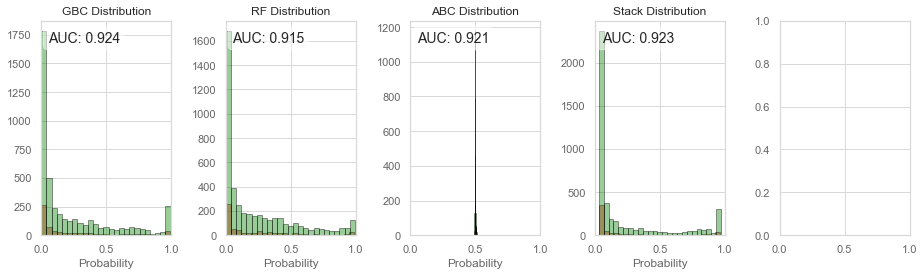

In [286]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [280]:
# Define parameter grid 
params_stack = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid_sclf = GridSearchCV(estimator = sclf, 
                    param_grid = params_stack, 
                    cv = 5,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = -1)

# Fit GridSearchCV
grid_sclf.fit(X_train, y_train)

# Making prediction on test set
y_pred = grid_sclf.predict_proba(X_test)[:,1]

# Getting AUC
auc = metrics.roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 47.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 51.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 62.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 71.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 80.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 92.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 102.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 114.0min finished


The AUC of the tuned Stacking classifier is 0.923


In [281]:
grid_sclf.best_params_

{'meta_classifier__C': 1,
 'meta_classifier__degree': 3,
 'meta_classifier__kernel': 'linear',
 'meta_classifier__probability': True}

#### Check the f1 score

In [294]:
sclf.fit(X_train, y_train)

StackingCVClassifier(classifiers=[GradientBoostingClassifier(max_depth=4,
                                                             min_samples_leaf=2,
                                                             min_samples_split=10,
                                                             n_estimators=150,
                                                             random_state=42),
                                  RandomForestClassifier(bootstrap=False,
                                                         max_depth=35,
                                                         max_features='sqrt',
                                                         min_samples_leaf=6,
                                                         min_samples_split=10,
                                                         n_estimators=200,
                                                         random_state=42),
                                  AdaBoostClassifier(learning_rate=0.61,
  

In [295]:
# Get the predicted values
y_pred = sclf.predict(X_test)

In [296]:
# Compute the score
f1 = f1_score(y_test, y_pred, average='micro')
f1

0.8725446428571428

# Final training with the whole training set and prediction for the test set

In [303]:
# Final check that the training set and the test set have the same columns
list(train_data_scaled) == list(test_data_scaled)

False

In [304]:
X_train = train_data_scaled[features_to_keep_2].copy()
y_train = train_target.copy()

X_test = test_data_scaled[features_to_keep_2].copy()

In [305]:
# Final check that the training set and the test set have the same columns
list(X_train) == list(X_test)

True

In [306]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(learning_rate = .1,
                                        n_estimators = 150,
                                        min_samples_split = 10,
                                        min_samples_leaf = 2,
                                        max_depth = 4,
                                        subsample = 1.0,
                                        max_features = None,
                                        random_state = 42)

# Random Forest Classifier
rf_model = RandomForestClassifier(bootstrap=False, 
                                      max_depth=35, 
                                      max_features='sqrt',
                                      min_samples_leaf=6,
                                      min_samples_split=10,
                                      n_estimators=200,
                                      random_state=42)
# MLP Classifier
mlp_model = MLPClassifier(activation = 'tanh',
                         alpha = 4e-05,
                         hidden_layer_sizes = (10,),
                         learning_rate = 'constant',
                         learning_rate_init = 0.01,
                         random_state = 42,
                         solver = 'adam')

# Ada Boost Classifier
abc_model = AdaBoostClassifier(algorithm = 'SAMME.R',
                               n_estimators = 962, 
                               learning_rate = 0.61,
                              random_state = 42)

# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [gbc_model, rf_model, abc_model],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [307]:
# Create dict to store classifiers
classifiers = {"GBC" : gbc_model,
               "RF" : rf_model,
               "ABC" : abc_model,
               #"MLP" : mlp_model,
               "Stack" : sclf}

subclassifiers = {"GBC" : gbc_model,
               "RF" : rf_model,
               "ABC" : abc_model
               #"MLP" : mlp_model
                 }

In [308]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

## Prediction for test set

In [309]:
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

In [310]:
results

,GBC,RF,ABC,Stack
0,1,1,1,1
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
10095,1,1,1,1
10096,1,1,1,1
10097,0,0,0,0
10098,0,0,0,0


In [311]:
# Get results
results_proba_subclassifiers = pd.DataFrame()
for key in subclassifiers:
    
    # Make prediction on test set for the subclassifiers
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results_proba_subclassifiers[f"{key}"] = y_pred
    
# Make prediction on test set for the subclassifiers
y_pred = classifiers["Stack"].predict(X_test)

# Save results in pandas dataframe object
results_proba_subclassifiers[f"{'Stack'}"] = y_pred

In [312]:
results_proba_subclassifiers

,GBC,RF,ABC,Stack
0,0.510509,0.571116,0.500030,1
1,0.081705,0.166925,0.499047,0
2,0.985266,0.792173,0.503151,1
3,0.340492,0.391096,0.499918,0
4,0.543325,0.519282,0.500021,1
...,...,...,...,...
10095,0.982381,0.959779,0.502226,1
10096,0.991163,0.940434,0.508319,1
10097,0.007606,0.002631,0.497418,0
10098,0.005979,0.002992,0.498018,0


In [313]:
# Check if both solutions do the same
pd.unique(results_proba_subclassifiers['Stack'] == results['Stack'])

array([ True])

**They do.**

In [314]:
final_prediction = results['Stack'].copy()

In [315]:
df_for_kaggle = pd.DataFrame(data={'CITIZEN_ID': test_encoded.CITIZEN_ID, 'Income': final_prediction})
df_for_kaggle.set_index('CITIZEN_ID', inplace=True)
df_for_kaggle

,Income
CITIZEN_ID,
34886,1
34887,0
34888,1
34889,0
34890,1
...,...
44981,1
44982,1
44983,0


In [316]:
df_for_kaggle.to_csv(path_or_buf='Group50_VersionXX.csv', sep=',')